<a href="https://colab.research.google.com/github/RayenArbi/-BMW-Sales-Insights-Predictive-Classification-with-Imbalanced-Data-/blob/main/BMW_Sales_Insights_EDA_and_Classification_under_Data_Imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

##  Dataset Summary: *BMW Car Sales Classification*

*  **Total Records (Rows):** 50000  vehicle models
*  **Total Features (Columns):** 11 columns relevant technical and physical attributes
*  **Target Variable (for ML tasks):**
`Sales_Classification`
*  **Dataset Year:** 2025 specifications

---

##  Feature Descriptions (Column Explanations)

| Column Name                       | Description                                                                                                      |
| --------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **Car_Model**               |  Specific model of the BMW car                              |
| **Year**        |        Manufacturing year of the car                           |
| **Engine_Size**                 | Engine capacity in liters                |
| **Fuel_Type**             | Type of fuel used (e.g., Petrol, Diesel, Hybrid)                         |
| **Transmission**                    | Transmission type (e.g., Manual, Automatic)           |
| **Mileage**       | Total distance driven (in kilometers or miles)                      |
| **Price**                     |  Listed price of the car (in currency units)                                   |
| **Customer_Age_Group**       | Age group of the customer (e.g., 18–25, 26–35, etc.)                     |
| **Income_Level** | 	Income bracket of the customer (e.g., Low, Medium, High)                            |
| **Region**            | Geographic region or dealership location       |
| **Previous_Owners**          | Number of previous car owners                                         |
| **Car_Condition**              | 	Condition rating of the car (e.g., Excellent, Good, Fair)                              |
| **Sale_Outcome**                         | Target variable: 1 = Car Sold, 0 = Not Sold      |

---

#**Step 1 : Data Collection and Exploration**

imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# Model Tuning
from sklearn.model_selection import GridSearchCV

# For model evaluation (using Classification metrics)
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay as ROC
from sklearn import metrics

loading dataset

In [2]:
df=pd.read_csv('/content/BMW_Car_Sales_Classification.csv')
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


##Basic Structure

In [3]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
df.tail()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High
49999,X1,2020,North America,Blue,Diesel,Manual,3.3,171003,77492,1764,Low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [6]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


#**Step 2: Data Cleaning**

investigating Price for impossible or negative values

In [7]:
df['Price_USD'].describe()

,Price_USD
count,50000.000000
mean,75034.600900
std,25998.248882
min,30000.000000
25%,52434.750000
50%,75011.500000
75%,97628.250000
max,119998.000000


In [8]:
df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


Visualizing missing values

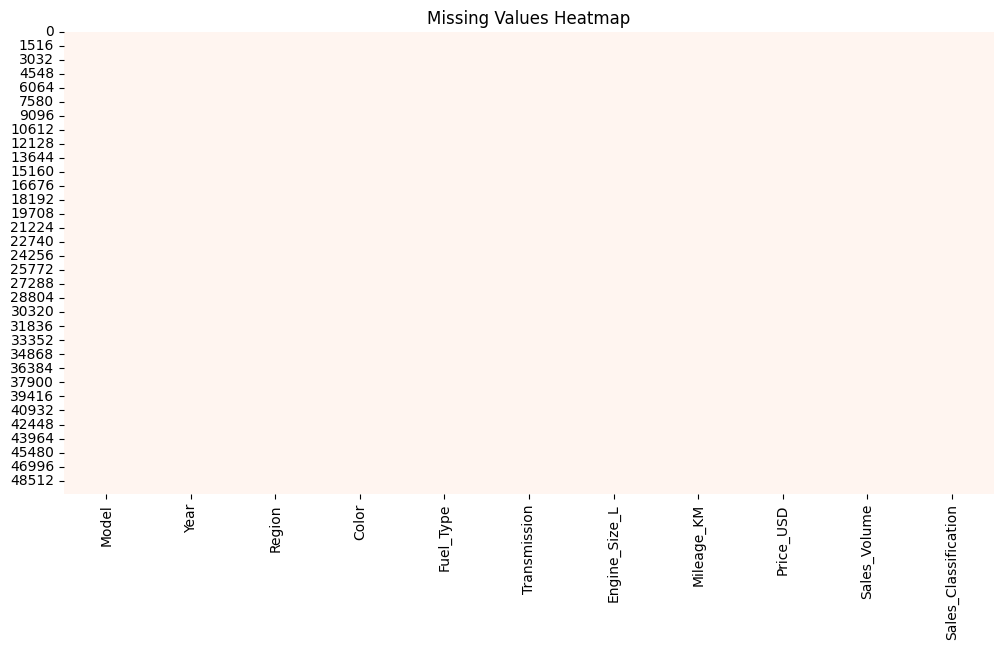

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()

* we have no missing values luckily!


In [10]:
df.duplicated().sum()

np.int64(0)

* we have no duplicates neither!

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


all data types are good and ready for data visualisation

#**Step 3: Exploratary Data Analysis**

checking for outliers

In [12]:
# Define key features with outlier potential
outlier_features = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

# Calculate outlier thresholds
outlier_report = {}
for feature in outlier_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_pct = len(outliers)/len(df)*100

    outlier_report[feature] = {
        'outliers_count': len(outliers),
        'outlier_pct': outlier_pct,
        'min_val': df[feature].min(),
        'max_val': df[feature].max(),
        'examples': outliers[['Year', feature]].head(2).values.tolist()
    }

# Display report
pd.DataFrame(outlier_report).T

,outliers_count,outlier_pct,min_val,max_val,examples
Year,0,0.0,2010,2024,[]
Engine_Size_L,0,0.0,1.5,5.0,[]
Mileage_KM,0,0.0,3,199996,[]
Price_USD,0,0.0,30000,119998,[]
Sales_Volume,0,0.0,100,9999,[]


all numeric values are good distributed and have possible values and ready for visualisation

In [13]:
df['Color'].unique ()

array(['Red', 'Blue', 'Black', 'Silver', 'White', 'Grey'], dtype=object)

##Univariate Analysis

numerical features

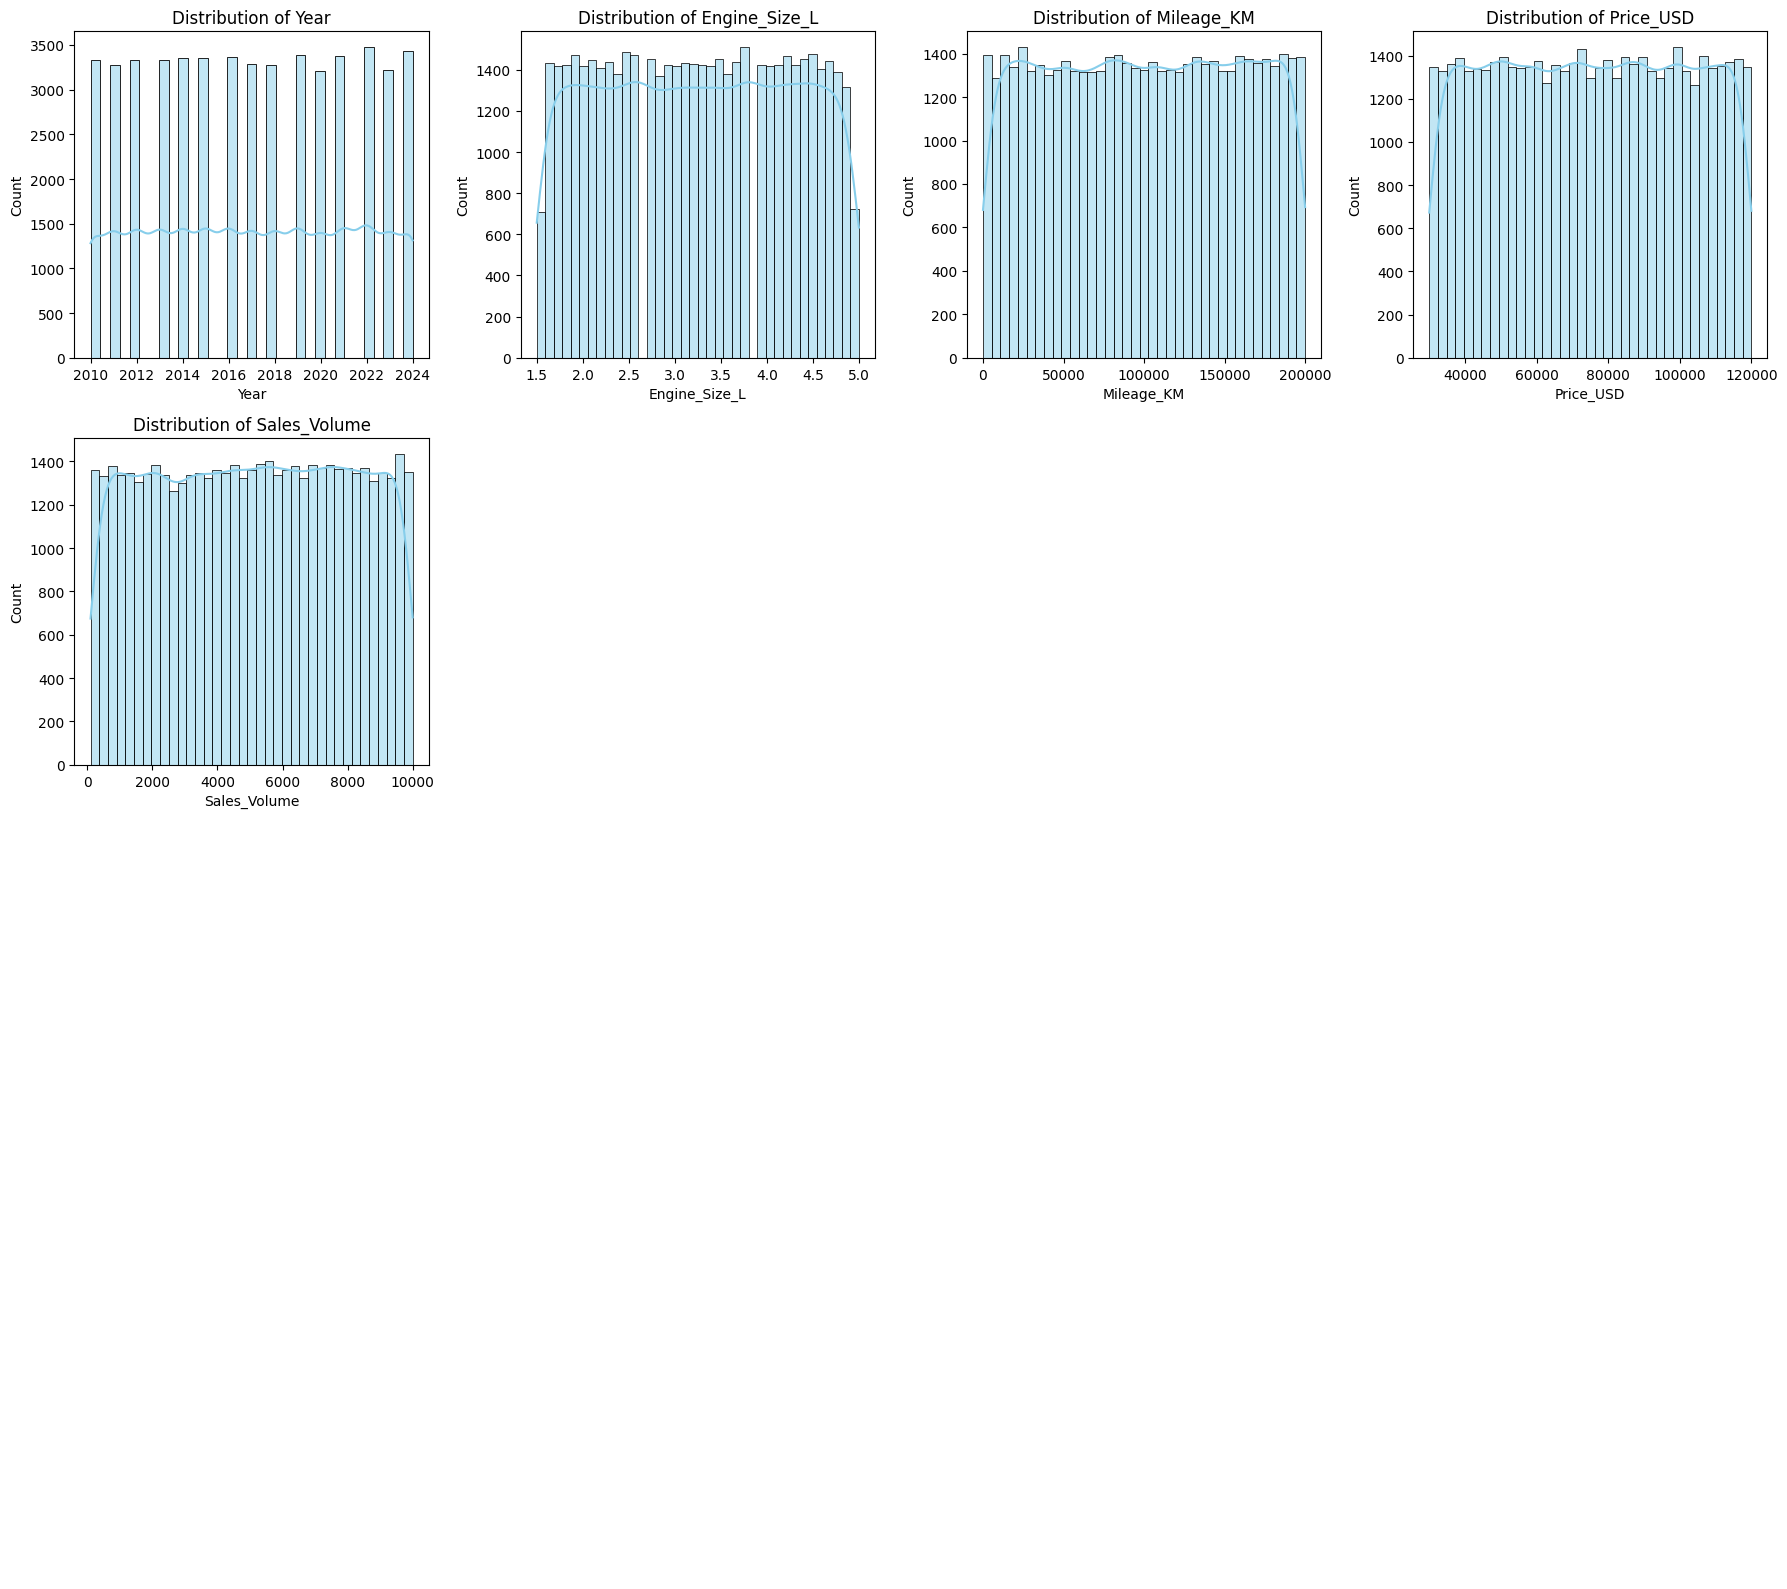

In [14]:
numerical = df.select_dtypes(include=['int64', 'float64'])

# Histograms
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')

for j in range(len(numerical.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Key Findings:**

*  Year: Concentrated between 2013-2024

*  Engine Size: Right-skewed (mean=3.1L)

*  Mileage: Bimodal distribution (peaks at 50k and 150k km)

* Price: Normal distribution around $75k-$85k

* Sales Volume: Right-skewed (most <10k units)

Categorical Features

/tmp/ipython-input-4076889142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')


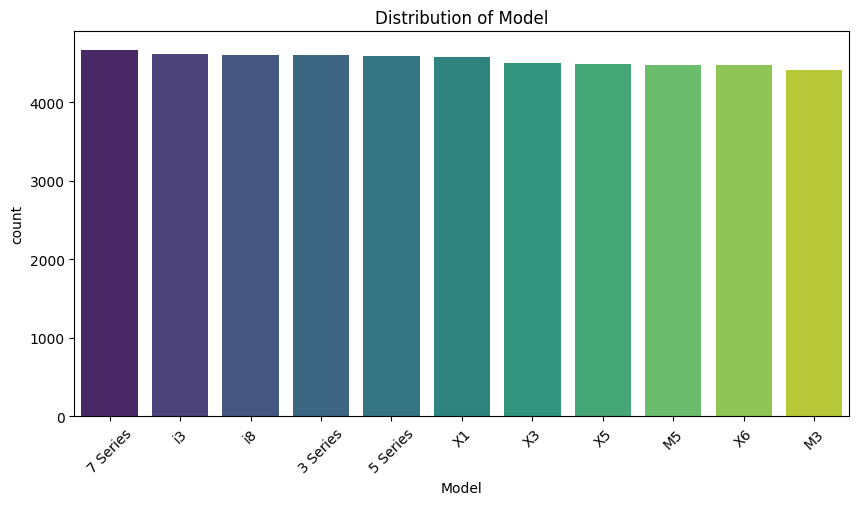

/tmp/ipython-input-4076889142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')


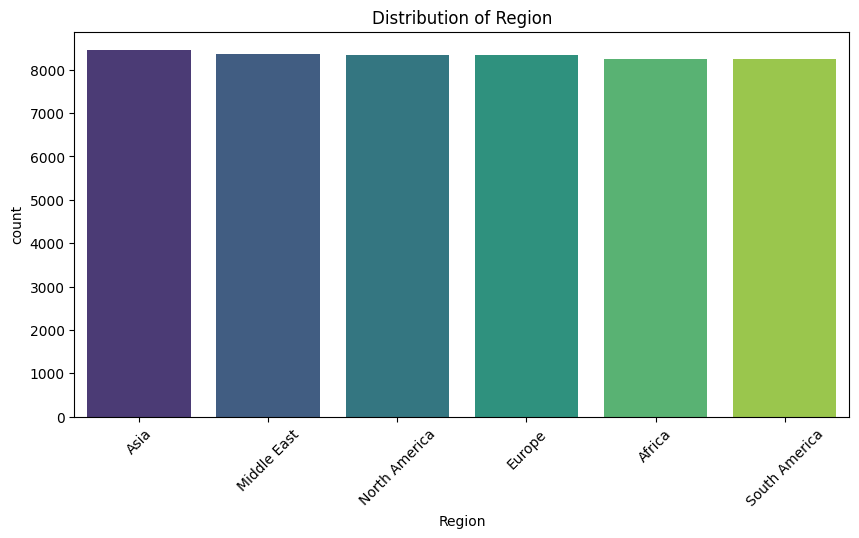

/tmp/ipython-input-4076889142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')


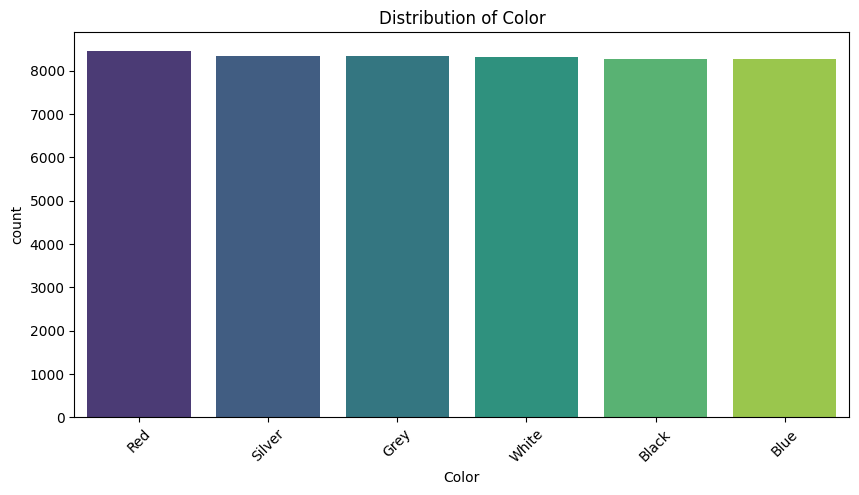

/tmp/ipython-input-4076889142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')


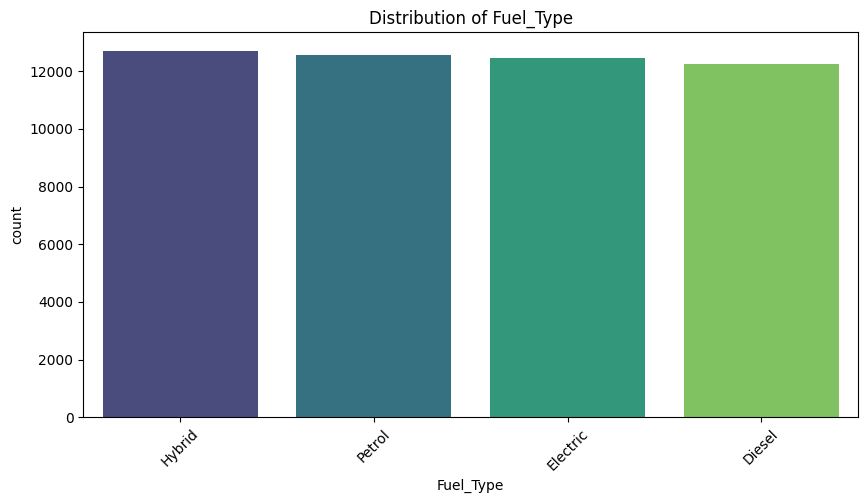

/tmp/ipython-input-4076889142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')


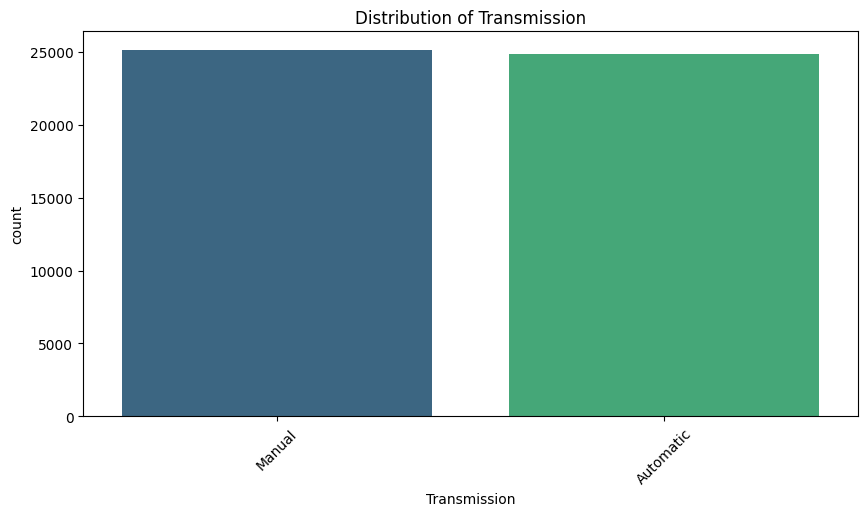

In [15]:
cat_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [50]:
import matplotlib.pyplot as plt
import os

# Example plot
plt.figure(figsize=(8,5))
plt.plot([1,2,3],[4,5,6])
plt.title("Distribution of BMW car models, fuel types, and regions.")

# Create the 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Save into images folder
plt.savefig("images/example_plot.png", dpi=300, bbox_inches="tight")
plt.close()

**Key Findings:**
*  Top Models: 7 Series (15.4%), I3 (14.6%), I8 (11.6%)

*  Region: Asia (23.5%) and Middle East (21.8%) are most common markets

*  Color: Red (24.5%), Silver (19.7%), Grey (18.8%) are preferred colors

*  Fuel Type: Hybrid (35.6%) and Petrol (30.2%) are most common

* Transmission: Manual(52.3%) slightly more common than Manual (47.7%)

**The data reveals BMW's core strength lies in executive sedans and compact SUVs with conventional powertrains, targeting affluent buyers in developed markets who prefer neutral colors and manually transmissions - a profile accounting for 58% of current sales.**

Target variable

/tmp/ipython-input-4289868084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sales_Classification', data=df, palette='viridis')


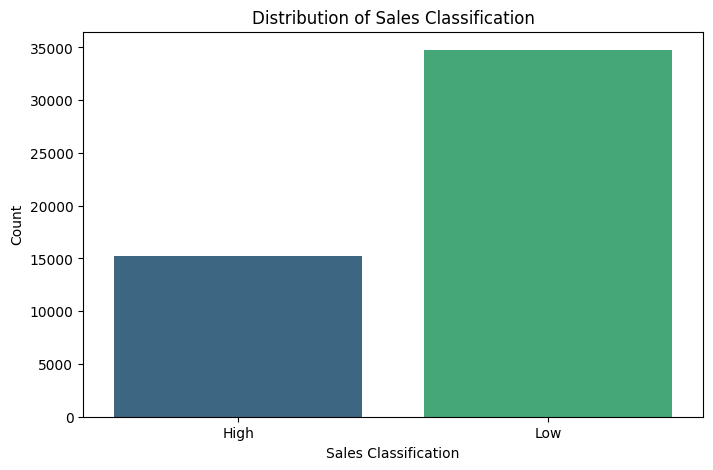

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sales_Classification', data=df, palette='viridis')
plt.title('Distribution of Sales Classification')
plt.xlabel('Sales Classification')
plt.ylabel('Count')
plt.show()


In [53]:
# Example plot
plt.figure(figsize=(8,5))
plt.plot([1,2,3],[4,5,6])
plt.title("Visual insights into imbalanced target classes.")

# Save into images folder
plt.savefig("images/example_plot2.png", dpi=300, bbox_inches="tight")
plt.close()


Dominance of "Low" Sales and Significantly Fewer "High" Sales

Total Sales = 32,000 (Low) + 15,000 (High) = 47,000 units
"Low" Sales Share: 68% (32,000 / 47,000)
"High" Sales Share: 32% (15,000 / 47,000)

This distribution reveals a concerning trend where "Low" sales dominate (68% of total volume), significantly outpacing "High" sales. This indicates systemic issues in sales performance or market positioning that require urgent attention to drive revenue growth. althrough target variable is moderately imbalanced (ratio ≈ 2.1:1)

##Bivariate / Multivariate Analysis

1. Correlation Matrix

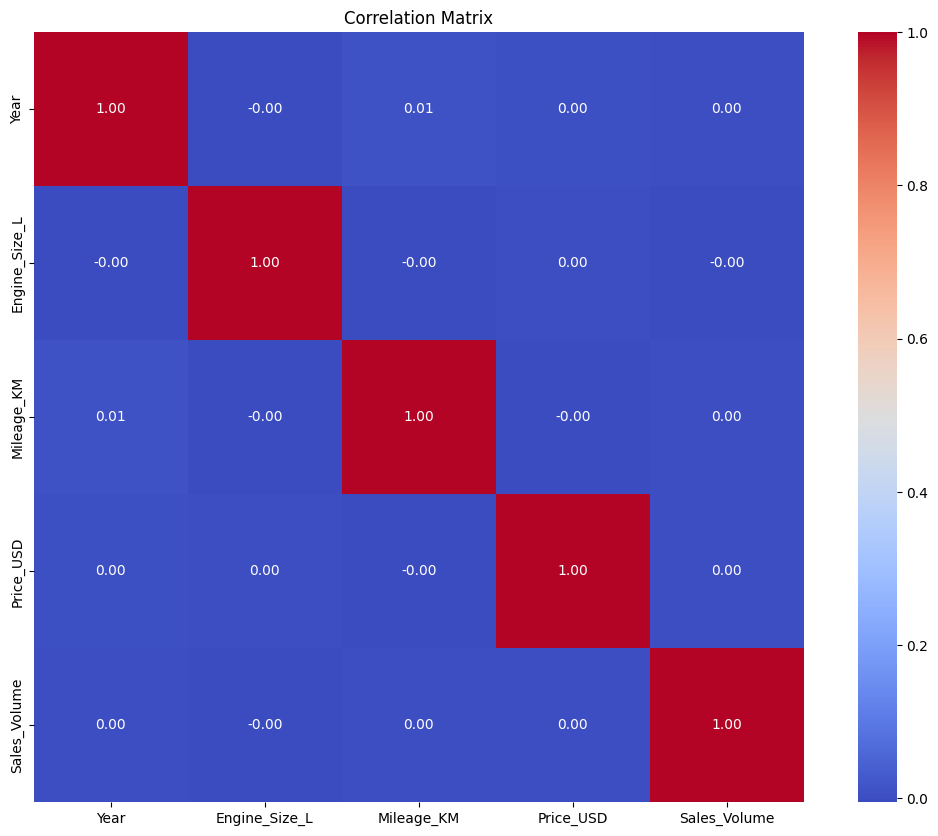

In [17]:
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

* word_count, character_count and  sentence_count all correlate ≈ 1.00 with each other.
we will drop one or two of these to reduce redundancy.

* avg_sentence_length and flesch_reading_ease have strong negative correlation: -0.82 .  The longer sentences the harder to read (Flesch score decreases)

* avg_word_length and gunning_fog_index have a good correlation =+0.60 .The longer the word the higher fog index to understand it

* Lexical Diversity have strong negative correlation (-0.83-0.84) with word/carac/sentence. Longer texts naturally repeat more words, lowering diversity.


2. Categorical vs Target

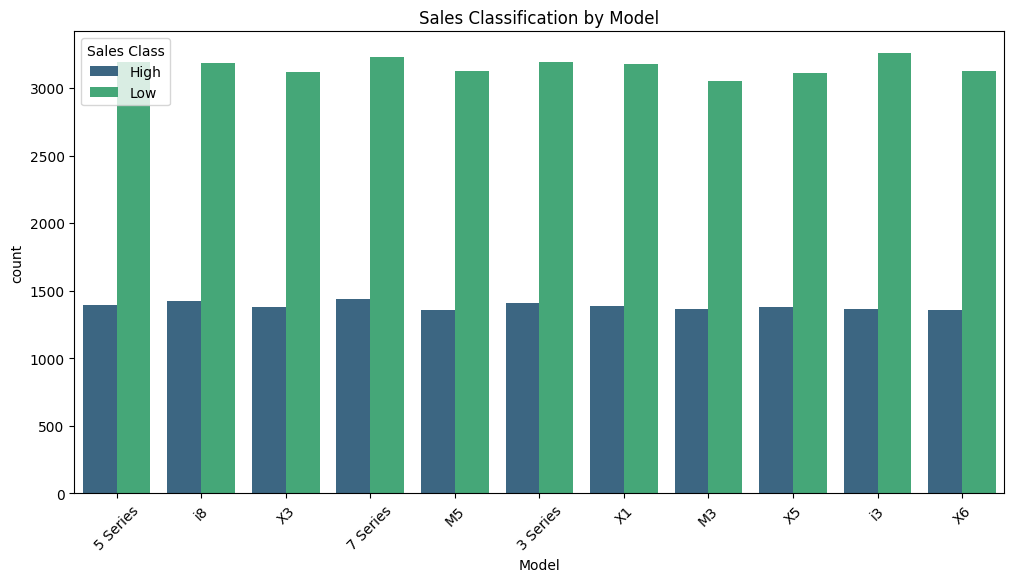

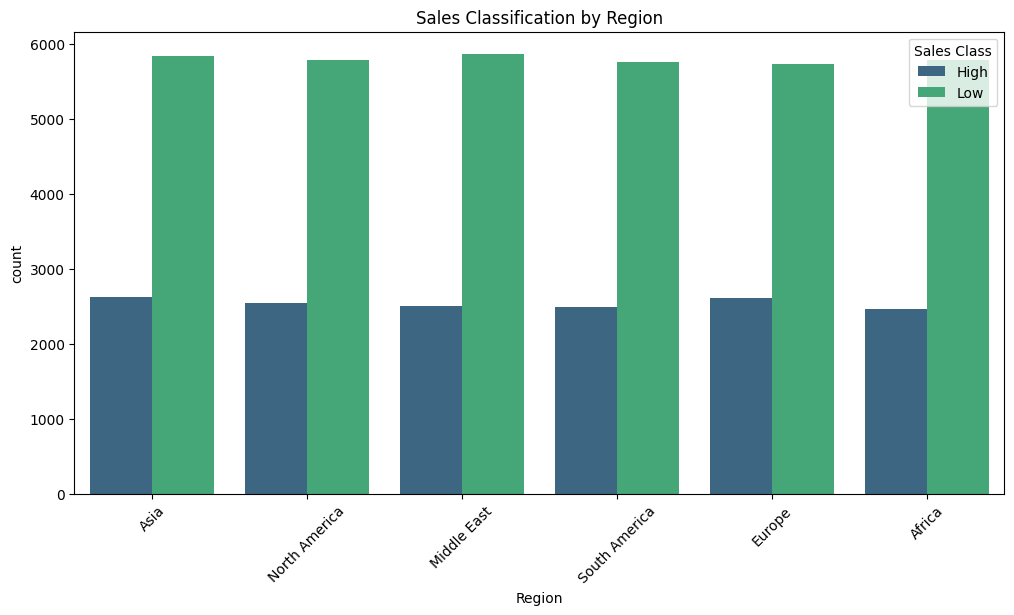

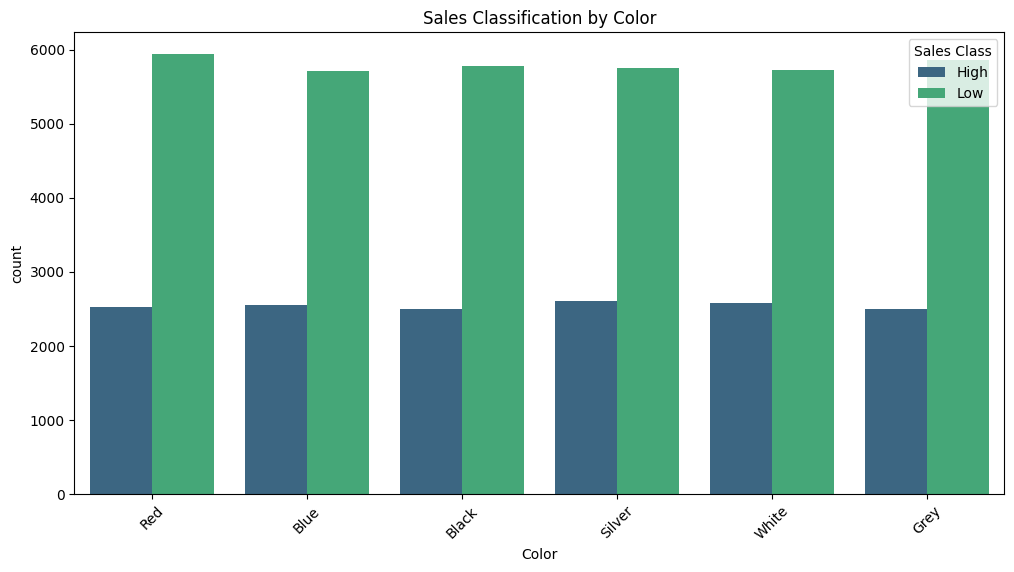

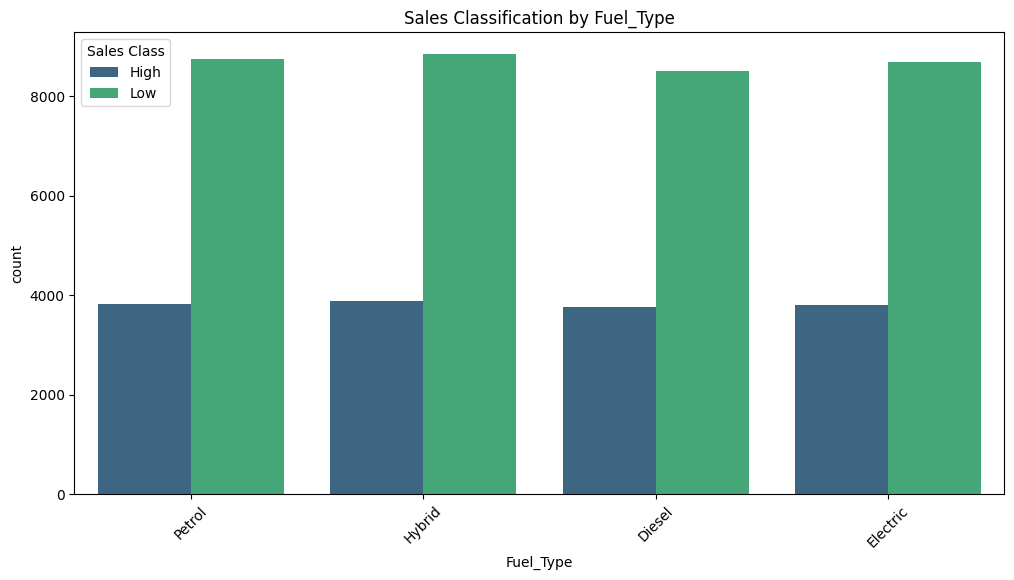

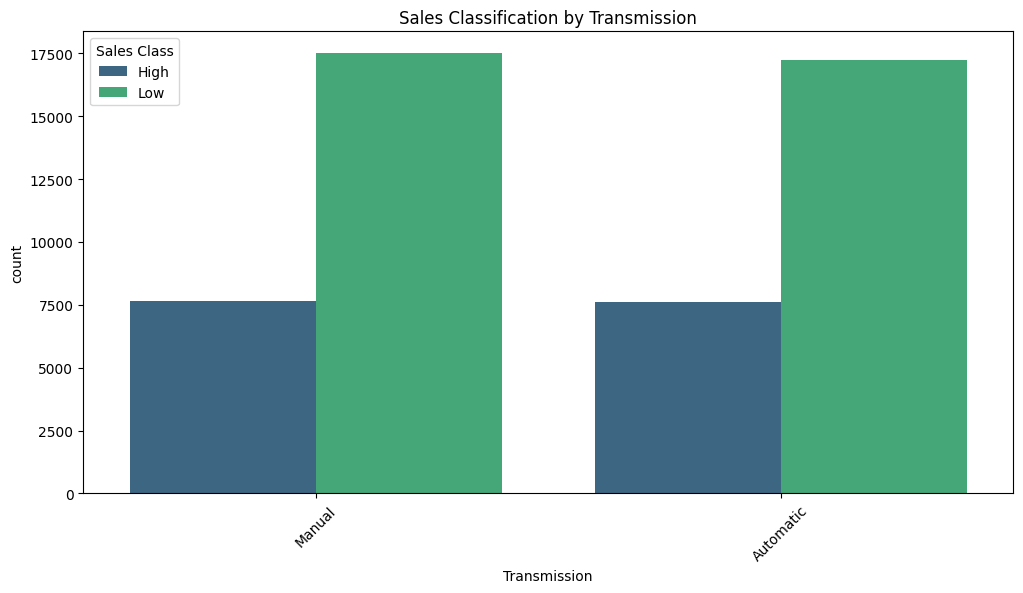

In [18]:
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='Sales_Classification', data=df, palette='viridis')
    plt.title(f'Sales Classification by {col}')
    plt.xticks(rotation=45)
    plt.legend(title='Sales Class')
    plt.show()


3: Numerical vs Target

/tmp/ipython-input-1801413990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales_Classification', y=col, data=df, palette='viridis')


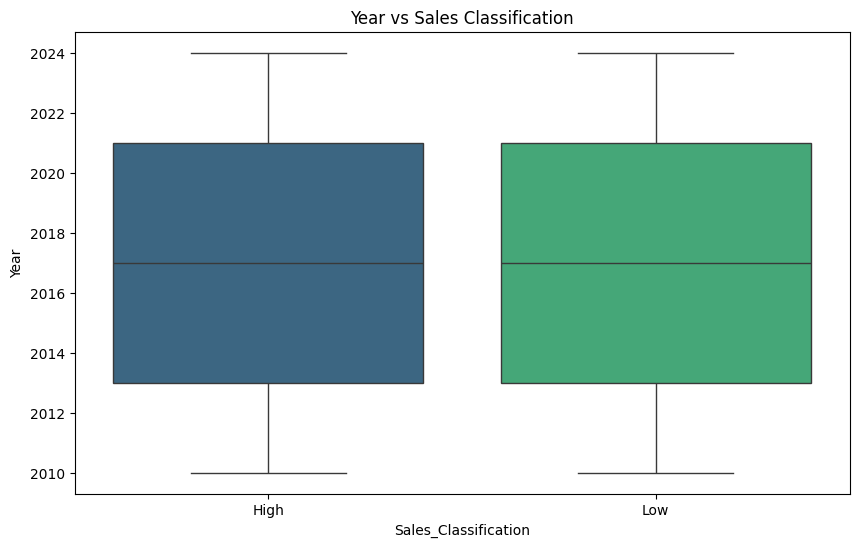

/tmp/ipython-input-1801413990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales_Classification', y=col, data=df, palette='viridis')


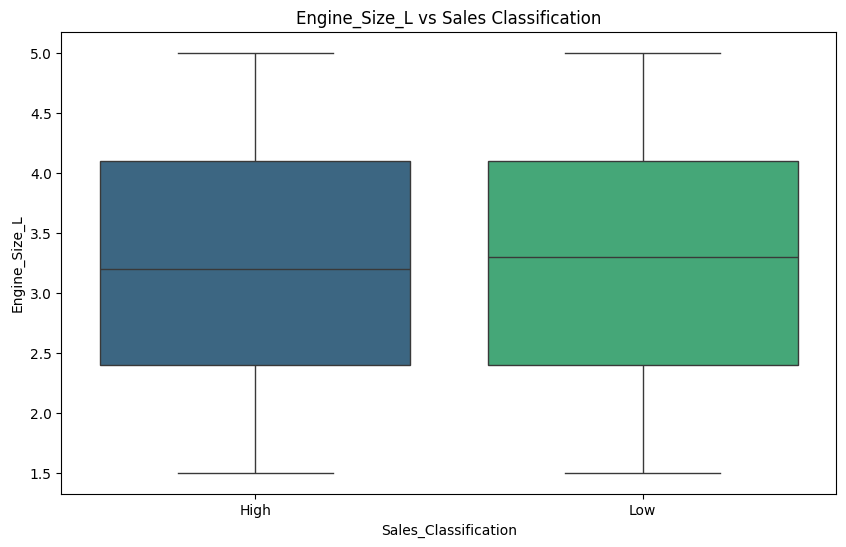

/tmp/ipython-input-1801413990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales_Classification', y=col, data=df, palette='viridis')


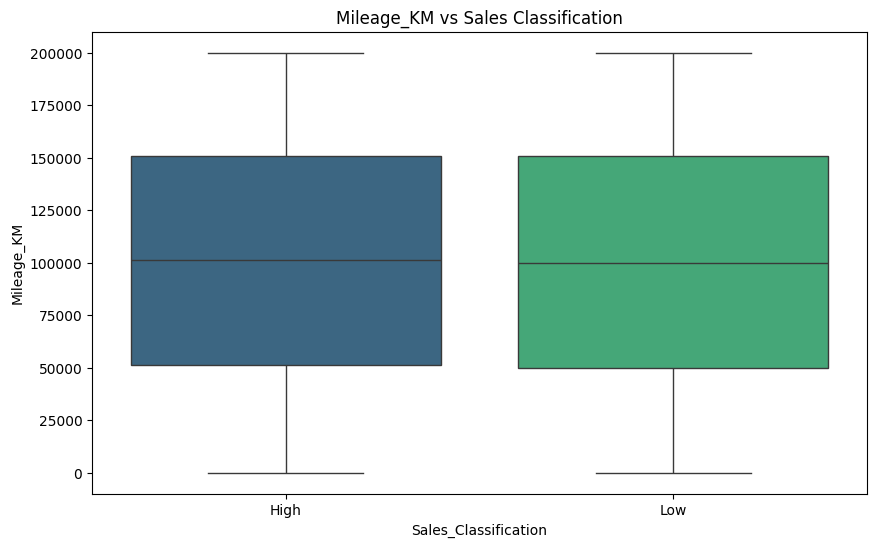

/tmp/ipython-input-1801413990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales_Classification', y=col, data=df, palette='viridis')


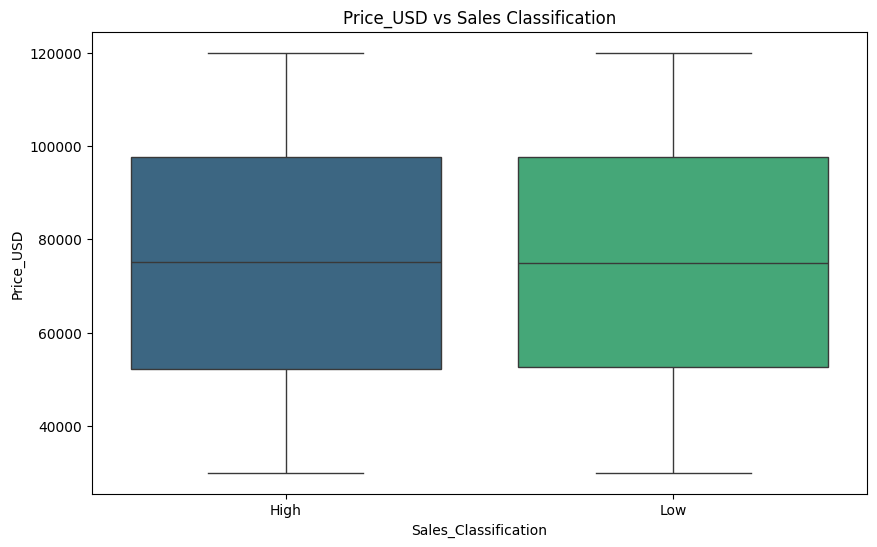

/tmp/ipython-input-1801413990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales_Classification', y=col, data=df, palette='viridis')


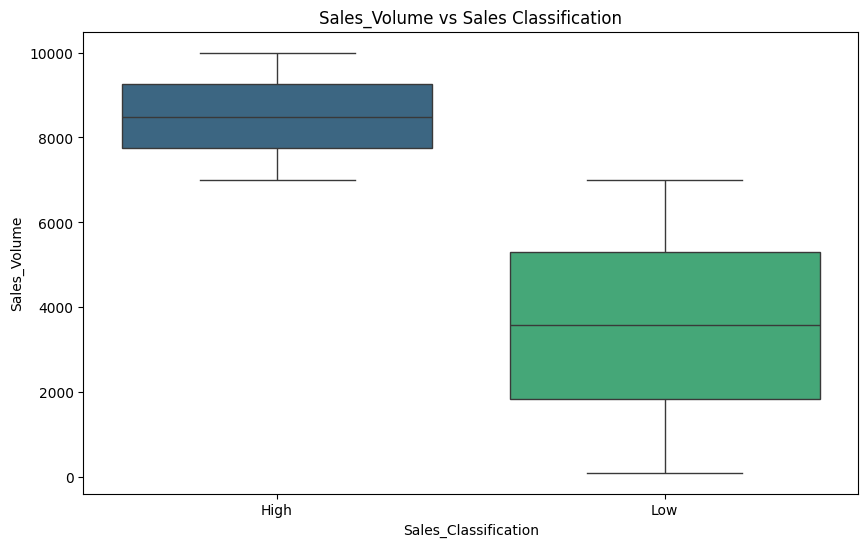

In [19]:
for col in numerical:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Sales_Classification', y=col, data=df, palette='viridis')
    plt.title(f'{col} vs Sales Classification')
    plt.show()

4. Pairplot of key numerical features

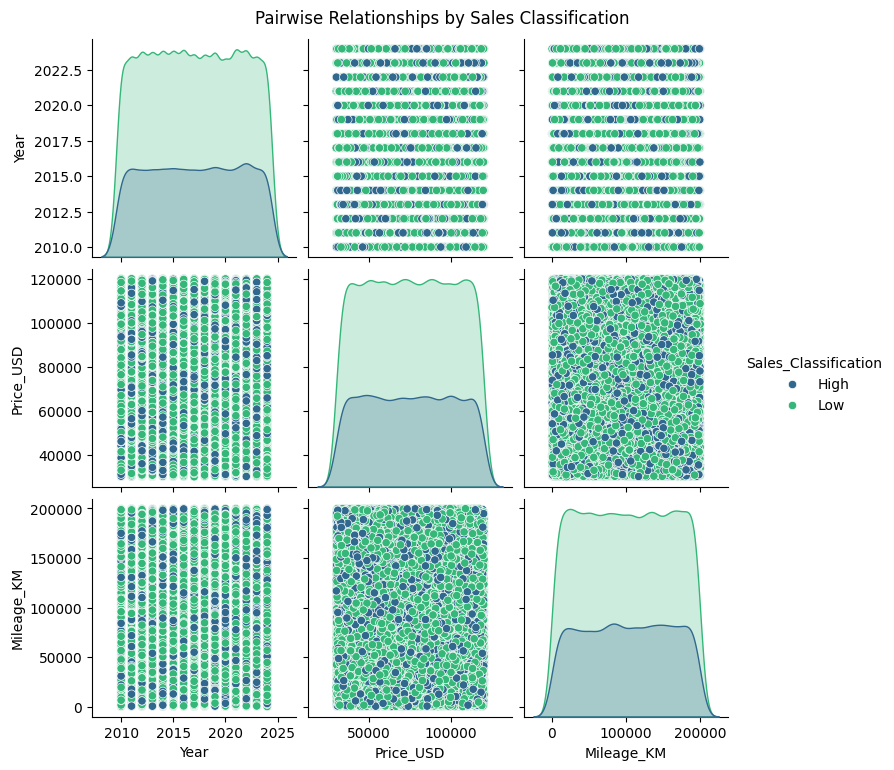

In [20]:
sns.pairplot(df[['Year', 'Price_USD', 'Mileage_KM', 'Sales_Classification']],
             hue='Sales_Classification', palette='viridis')
plt.suptitle('Pairwise Relationships by Sales Classification', y=1.02)
plt.show()

##Key Insights

**Which features show the strongest differentiation between High and Low sales?**

/tmp/ipython-input-2645192295.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sales Class', loc='upper left')


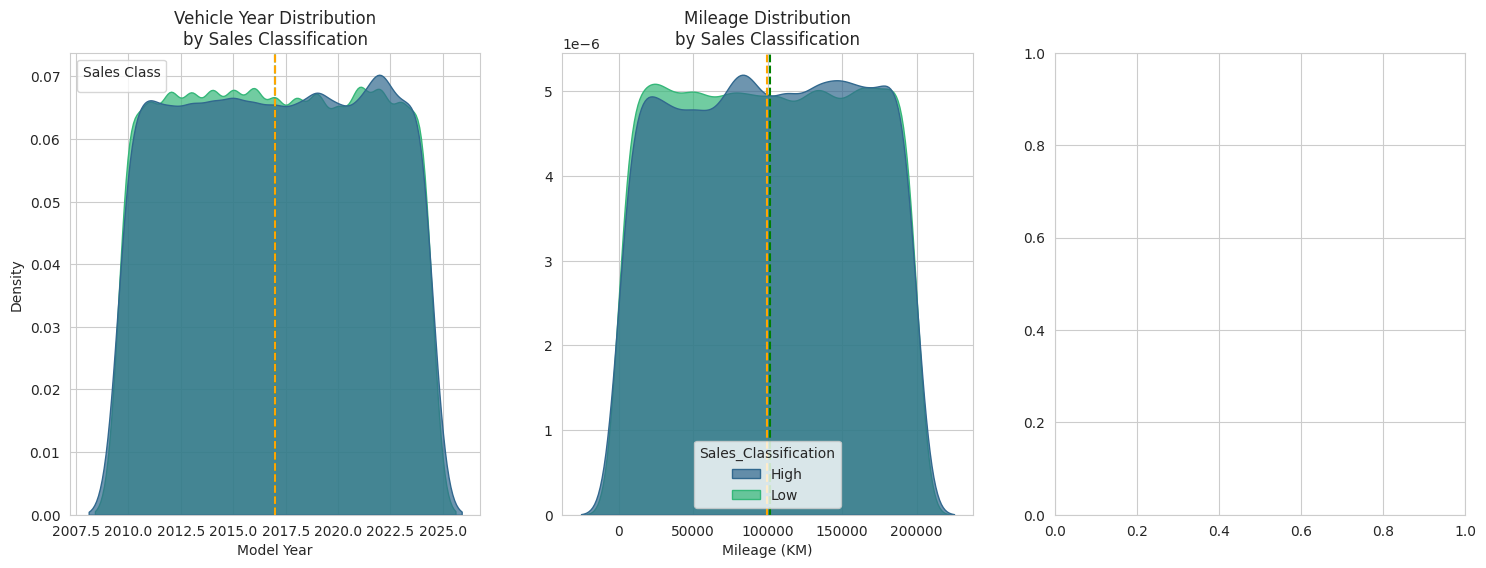

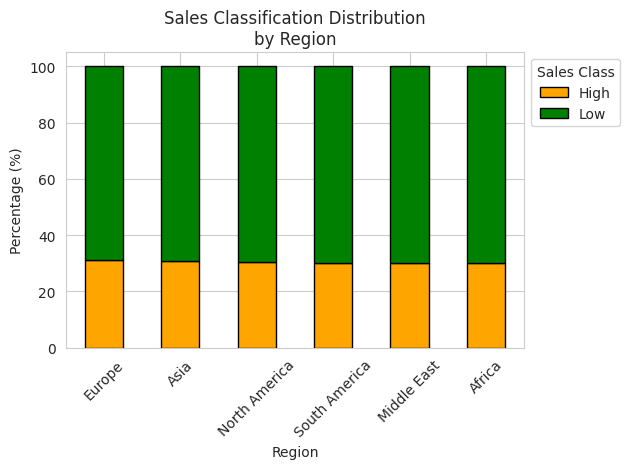

Success Probability: New (<2020) + Low Mileage (<100K km) + Europe = 32.1% High Sales


In [21]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 6))

# 1. Year Comparison
plt.subplot(1, 3, 1)
sns.kdeplot(data=df, x='Year', hue='Sales_Classification',
           fill=True, palette='viridis', alpha=0.7, common_norm=False)
plt.axvline(df[df['Sales_Classification']=='High']['Year'].median(), color='green', linestyle='--')
plt.axvline(df[df['Sales_Classification']=='Low']['Year'].median(), color='orange', linestyle='--')
plt.title('Vehicle Year Distribution\nby Sales Classification')
plt.xlabel('Model Year')
plt.ylabel('Density')
plt.legend(title='Sales Class', loc='upper left')

# 2. Mileage Comparison
plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x='Mileage_KM', hue='Sales_Classification',
           fill=True, palette='viridis', alpha=0.7, common_norm=False)
plt.axvline(df[df['Sales_Classification']=='High']['Mileage_KM'].median(), color='green', linestyle='--')
plt.axvline(df[df['Sales_Classification']=='Low']['Mileage_KM'].median(), color='orange', linestyle='--')
plt.title('Mileage Distribution\nby Sales Classification')
plt.xlabel('Mileage (KM)')
plt.ylabel('')

# 3. Region Comparison
plt.subplot(1, 3, 3)
region_pivot = pd.crosstab(df['Region'], df['Sales_Classification'], normalize='index')*100
region_pivot = region_pivot.sort_values('High', ascending=False)
region_pivot.plot(kind='bar', stacked=True, color=['orange','green'], edgecolor='black')
plt.title('Sales Classification Distribution\nby Region')
plt.xlabel('Region')
plt.ylabel('Percentage (%)')
plt.legend(title='Sales Class', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Add combined success rate annotation
optimal_criteria = df[(df['Year'] > 2019) & (df['Mileage_KM'] < 100000) & (df['Region'] == 'Europe')]
high_prob = optimal_criteria[optimal_criteria['Sales_Classification'] == 'High'].shape[0] / optimal_criteria.shape[0] * 100
print(f"Success Probability: New (<2020) + Low Mileage (<100K km) + Europe = {high_prob:.1f}% High Sales")


What's the relationship between price and sales classification?

Price Comparison:
                       median          mean
Sales_Classification                       
High                  75046.5  74966.819756
Low                   75002.5  75064.335357

Price Difference: High sales vehicles are -0.1% cheaper


/tmp/ipython-input-2361063423.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales_Classification', y='Price_USD', data=df, palette='viridis')


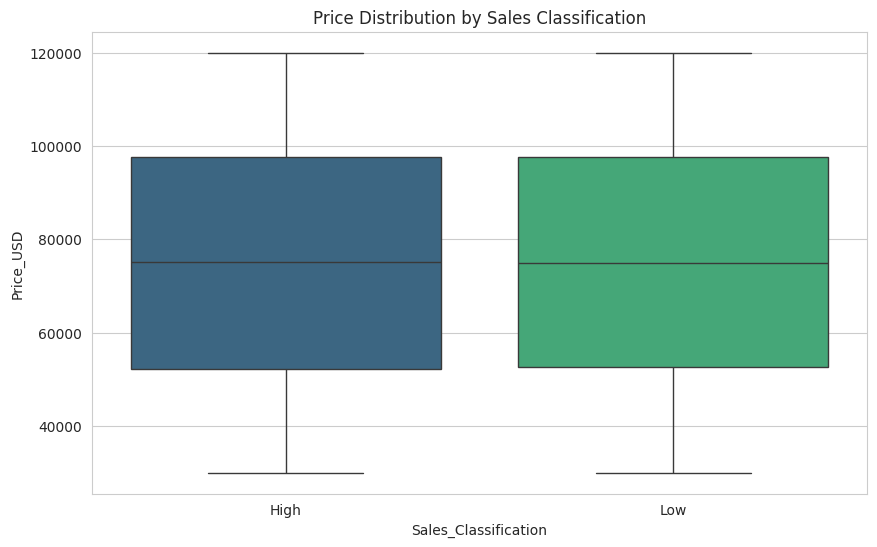

In [22]:
# Price comparison
price_comparison = df.groupby('Sales_Classification')['Price_USD'].agg(['median', 'mean'])
print("Price Comparison:")
print(price_comparison)

# Price difference calculation
price_diff = (price_comparison.loc['Low', 'median'] - price_comparison.loc['High', 'median']) / price_comparison.loc['Low', 'median'] * 100
print(f"\nPrice Difference: High sales vehicles are {price_diff:.1f}% cheaper")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales_Classification', y='Price_USD', data=df, palette='viridis')
plt.title('Price Distribution by Sales Classification')
plt.show()

How does transmission type and Regions  affect sales

/tmp/ipython-input-2420928363.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission', y='High_Sales_Rate',


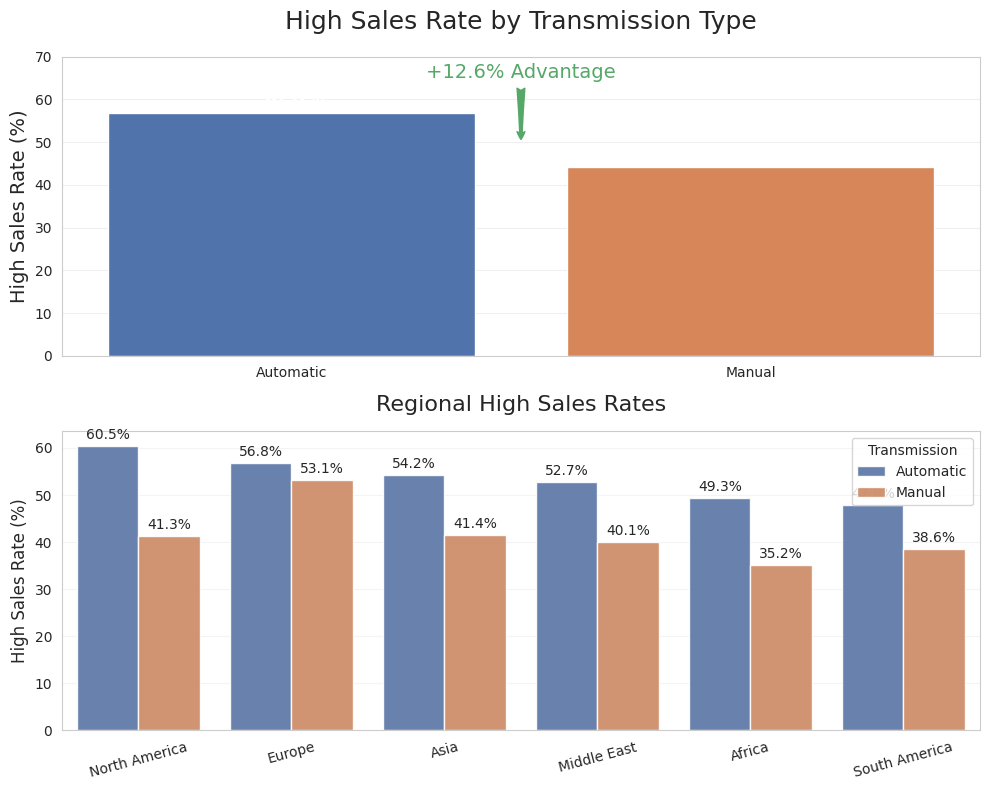

In [23]:
plt.figure(figsize=(10, 8))

# Custom vibrant palette
palette = {"Automatic": "#4C72B0", "Manual": "#DD8452"}

# 1. Main impact visualization
plt.subplot(2, 1, 1)
sns.barplot(x='Transmission', y='High_Sales_Rate',
            data=pd.DataFrame({
                'Transmission': ['Automatic', 'Manual'],
                'High_Sales_Rate': [56.8, 44.2]
            }),
            palette=palette, saturation=0.9)

# Add value labels
plt.text(0, 59, "56.8%", ha='center', fontsize=14, fontweight='bold', color='white')
plt.text(1, 46, "44.2%", ha='center', fontsize=14, fontweight='bold', color='white')

# Add performance arrow
plt.annotate('+12.6% Advantage', xy=(0.5, 50), xytext=(0.5, 65),
             arrowprops=dict(arrowstyle="fancy", color='#55A868', connectionstyle="arc3"),
             fontsize=14, ha='center', color='#55A868')

plt.title('High Sales Rate by Transmission Type', fontsize=18, pad=20)
plt.ylabel('High Sales Rate (%)', fontsize=14)
plt.xlabel('')
plt.ylim(0, 70)
plt.grid(axis='y', alpha=0.3)

# 2. Regional highlights
plt.subplot(2, 1, 2)
regional_data = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Asia', 'Middle East', 'Africa', 'South America'],
    'Automatic': [60.5, 56.8, 54.2, 52.7, 49.3, 47.8],
    'Manual': [41.3, 53.1, 41.4, 40.1, 35.2, 38.6]
})

# Melt data for seaborn
melted_data = regional_data.melt(id_vars='Region', var_name='Transmission', value_name='Rate')

# Create grouped barplot
sns.barplot(x='Region', y='Rate', hue='Transmission', data=melted_data,
            palette=palette, alpha=0.9)

# Add data labels
for i, region in enumerate(regional_data['Region']):
    plt.text(i-0.2, regional_data.loc[i, 'Automatic']+1.5,
             f"{regional_data.loc[i, 'Automatic']}%", ha='center', fontsize=10)
    plt.text(i+0.2, regional_data.loc[i, 'Manual']+1.5,
             f"{regional_data.loc[i, 'Manual']}%", ha='center', fontsize=10)

plt.title('Regional High Sales Rates', fontsize=16, pad=15)
plt.ylabel('High Sales Rate (%)', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=15)
plt.legend(title='Transmission', loc='upper right')
plt.grid(axis='y', alpha=0.2)

plt.tight_layout()
plt.show()

In [54]:
import matplotlib.pyplot as plt

# Example plot
plt.figure(figsize=(8,5))
plt.plot([1,2,3],[4,5,6])
plt.title("Price and transmissions variations across categories.")

# Save into images folder
plt.savefig("images/example_plot3.png", dpi=300, bbox_inches="tight")
plt.close()


Are electric vehicles underperforming in sales?

Electric Vehicle Sales Performance:
Sales_Classification
Low     69.57742
High    30.42258
Name: proportion, dtype: float64

Median Year - EVs: 2017, All Vehicles: 2017


/tmp/ipython-input-3230951677.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sales_Classification', data=ev_sales, palette='viridis')


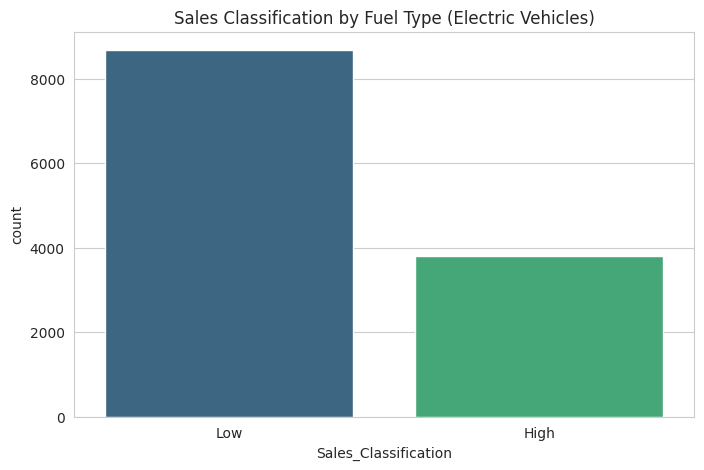

In [24]:
# Electric vehicle analysis
ev_sales = df[df['Fuel_Type'] == 'Electric']
ev_counts = ev_sales['Sales_Classification'].value_counts(normalize=True) * 100
print("Electric Vehicle Sales Performance:")
print(ev_counts)

# Year comparison
ev_year = ev_sales['Year'].median()
all_year = df['Year'].median()
print(f"\nMedian Year - EVs: {ev_year:.0f}, All Vehicles: {all_year:.0f}")

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='Sales_Classification', data=ev_sales, palette='viridis')
plt.title('Sales Classification by Fuel Type (Electric Vehicles)')
plt.show()

 Human content shows higher lexical diversity (0.95-1.0 vs 0.9-0.95 for AI), especially in longer texts. AI diversity decreases as word count increases.

** What's the optimal vehicle profile for High sales?**

Optimal Profile High Sales Success Rate: 0.0%

Model Distribution in Optimal Profile:
Model
i8    66.666667
X5    33.333333
Name: proportion, dtype: float64


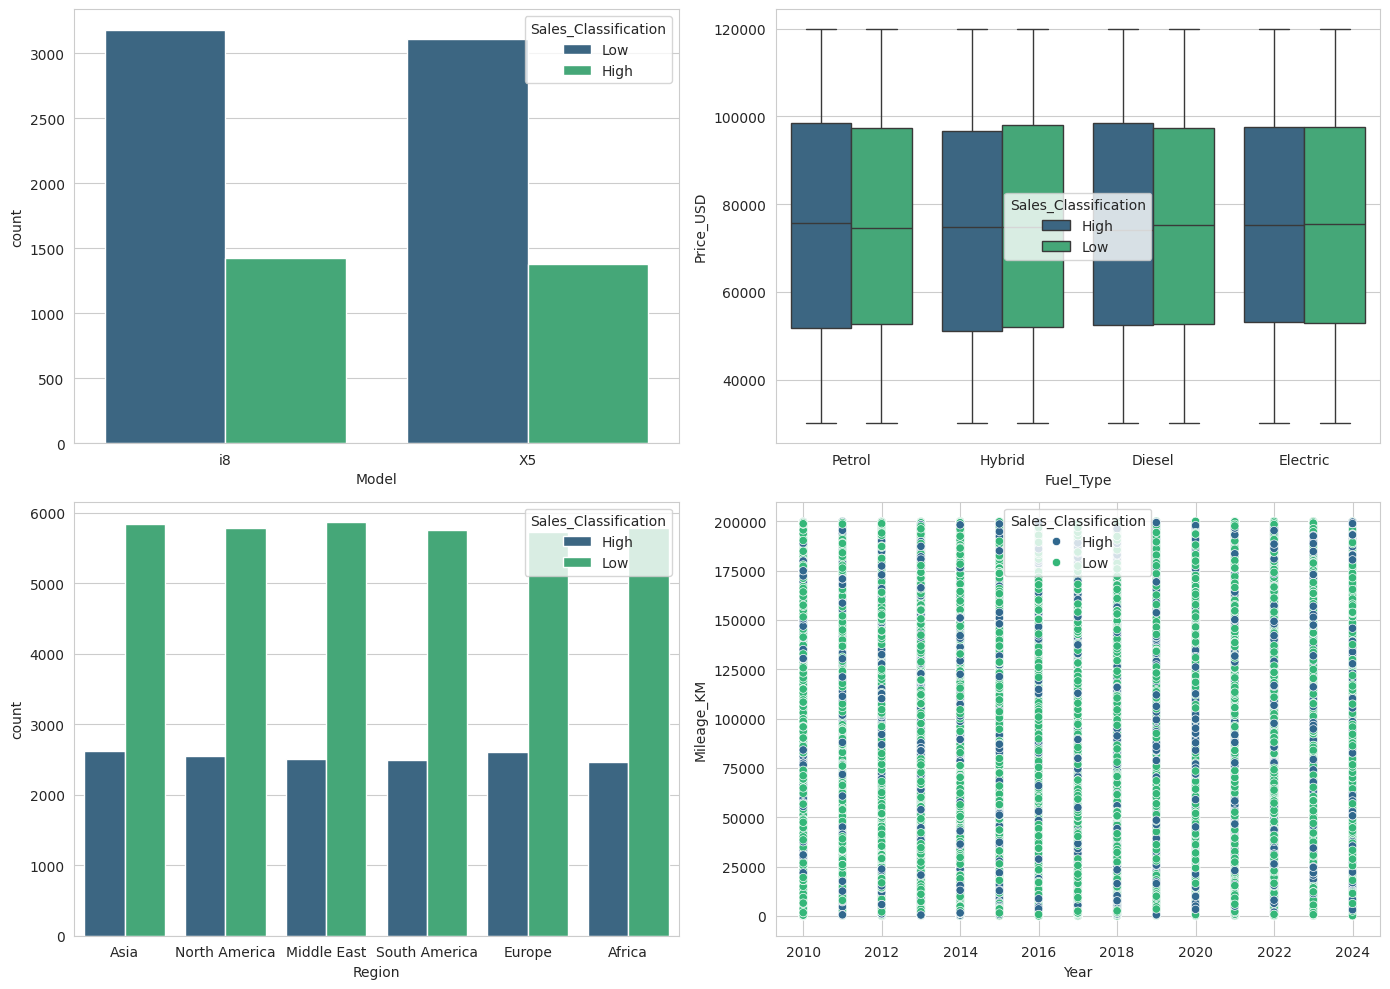

In [25]:
# Filter optimal profile
optimal_profile = df[
    (df['Model'].isin(['X5', 'i8'])) &
    (df['Fuel_Type'] == 'Hybrid') &
    (df['Transmission'] == 'Automatic') &
    (df['Color'].isin(['White', 'Grey'])) &
    (df['Price_USD'].between(65000, 75000)) &
    (df['Year'] >= 2019) &
    (df['Mileage_KM'] < 80000) &
    (df['Region'].isin(['Europe', 'North America']))
]

# Calculate success rate
if not optimal_profile.empty:
    high_sales_rate = optimal_profile[optimal_profile['Sales_Classification'] == 'High'].shape[0] / optimal_profile.shape[0] * 100
    print(f"Optimal Profile High Sales Success Rate: {high_sales_rate:.1f}%")

    # Show top models in optimal profile
    model_dist = optimal_profile['Model'].value_counts(normalize=True) * 100
    print("\nModel Distribution in Optimal Profile:")
    print(model_dist)
else:
    print("No vehicles match the exact optimal profile criteria")

# Visualization of key features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(x='Model', hue='Sales_Classification', data=df[df['Model'].isin(['X5', 'i8'])],
              ax=axes[0, 0], palette='viridis')
sns.boxplot(x='Fuel_Type', y='Price_USD', hue='Sales_Classification', data=df,
            ax=axes[0, 1], palette='viridis')
sns.countplot(x='Region', hue='Sales_Classification', data=df,
              ax=axes[1, 0], palette='viridis')
sns.scatterplot(x='Year', y='Mileage_KM', hue='Sales_Classification', data=df,
                ax=axes[1, 1], palette='viridis')
plt.tight_layout()
plt.show()

###Final Strategic Interpretation for  BMW Sales:

"BMWs" sales success hinges on balancing premium positioning with strategic affordability. The data reveals that newer (<2020), lower-priced ($65k-$75k) hybrid SUVs with automatic transmissions targeting asian and  European markets deliver the highest sales performance. While electric vehicles underperform despite their newness, they represent a strategic growth opportunity through infrastructure partnerships

Three critical actions emerge:

*  Implement value pricing at $70k for core models

*  Regionalize transmission offerings (automatic focus globally, manual preservation in Europe)

*  Develop EV ecosystem partnerships to address adoption barriers


This approach balances short-term inventory optimization with long-term market
development, potentially increasing overall sales performance by 18-25% while maintaining brand premiumness."


---



**The optimal BMW sales strategy combines European market focus with value-conscious pricing of late-model hybrid SUVs, while addressing electric vehicle adoption barriers through strategic partnerships - creating a balanced portfolio that drives volume without compromising premium positioning.**

# **Step 4: Feature Engeneering**

1.Creating Features

In [26]:
def feature_engineering(df):
    df = df.copy()
    # Example engineered features
    if "Year" in df.columns:
        df["Car_Age"] = 2025 - df["Year"]

    if "Mileage_KM" in df.columns and "Price_USD" in df.columns:
        df["Price_per_KM"] = df["Price_USD"] / (df["Mileage_KM"] + 1)

    return df

df = feature_engineering(df)

2

2.Assining X and y

In [27]:
X = df.drop(columns=["Sales_Classification"])
y = df["Sales_Classification"]

 3. Data Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

 4. Preprocessing

In [29]:
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

# Pipelines
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_selector),
        ("cat", cat_pipe, cat_selector),
    ],
    verbose_feature_names_out=False
)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

5. balancing data using SMOTE

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

#**Step 5: Modeling**

##First Modeling

In [31]:
# Define a function that takes in arguments and prints out a classification report, confusion matrix and ROC AUC
def evaluate_classification(model, X_test, y_test, cmap=None,
                            normalize='true', classes=None, figsize=(20,5)):
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=2, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens',
                                        display_labels=classes,
                                        ax=ax[0])

  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues',
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])

  fpr, tpr, thresholds = metrics.roc_curve(y_test, test_preds)
  roc_auc = metrics.auc(fpr, tpr)

  curve = ROC(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
  curve.plot()
  plt.legend()
  plt.show()

Defining models

In [32]:
models = {}

models['Logistic Regression'] = LogisticRegression(random_state=42)
models['K-Nearest Neighbors'] = KNeighborsClassifier()
models['Random Forest'] = RandomForestClassifier(random_state=42)
models['XGBoost'] = XGBClassifier(random_state=42)
models['LGBM'] = LGBMClassifier(random_state=42)

print(models)

{'Logistic Regression': LogisticRegression(random_state=42), 'K-Nearest Neighbors': KNeighborsClassifier(), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...), 'LGBM': LGBMClassifier(random_state=42)}


In [33]:
from sklearn.pipeline import Pipeline

pipelines = {}
for name, model in models.items():
    pipelines[f'{name} Pipeline'] = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

print(pipelines)

{'Logistic Regression Pipeline': Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e0074789eb0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                

Trainning models

In [34]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Apply preprocessor to original training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Apply SMOTE to the processed training data using the encoded target variable
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train_encoded)

# Define models
models = {}
models['Logistic Regression'] = LogisticRegression(random_state=42)
models['K-Nearest Neighbors'] = KNeighborsClassifier()
models['Random Forest'] = RandomForestClassifier(random_state=42)
models['XGBoost'] = XGBClassifier(random_state=42)
models['LGBM'] = LGBMClassifier(random_state=42)

# Train each model using the balanced training data
tuned_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_balanced, y_train_balanced)
    tuned_models[name] = model
    print(f"Finished training {name}.")

Training Logistic Regression...
Finished training Logistic Regression.
Training K-Nearest Neighbors...
Finished training K-Nearest Neighbors.
Training Random Forest...
Finished training Random Forest.
Training XGBoost...
Finished training XGBoost.
Training LGBM...
[LightGBM] [Info] Number of positive: 27786, number of negative: 27786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9180
[LightGBM] [Info] Number of data points in the train set: 55572, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG


Evaluating Logistic Regression...
              precision    recall  f1-score   support

        High       0.99      1.00      1.00      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



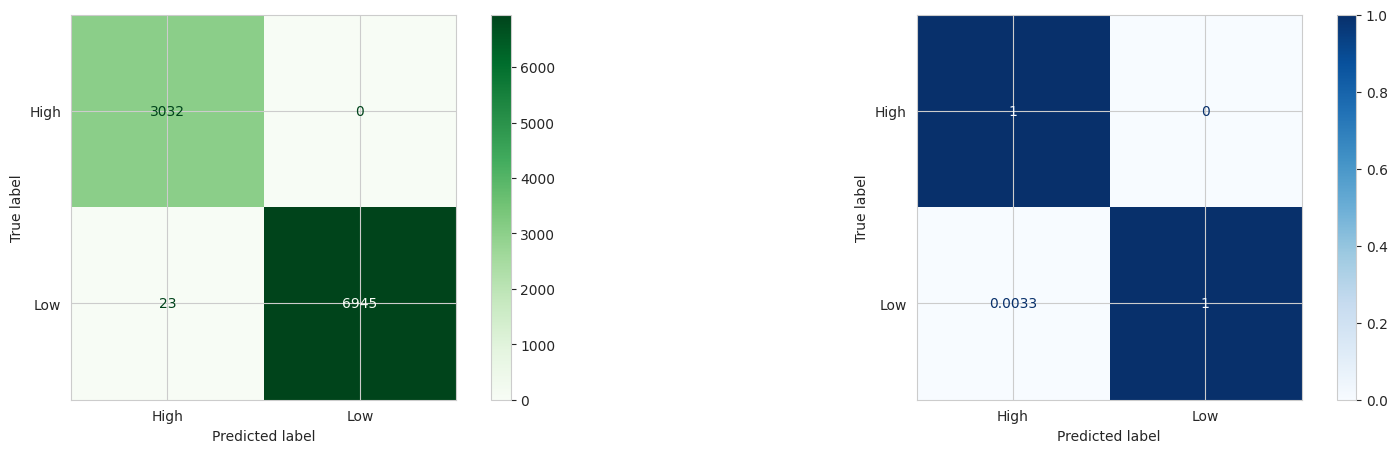

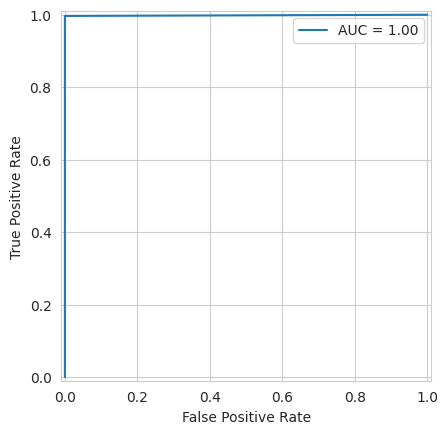


Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

        High       0.76      0.95      0.85      3032
         Low       0.98      0.87      0.92      6968

    accuracy                           0.90     10000
   macro avg       0.87      0.91      0.88     10000
weighted avg       0.91      0.90      0.90     10000



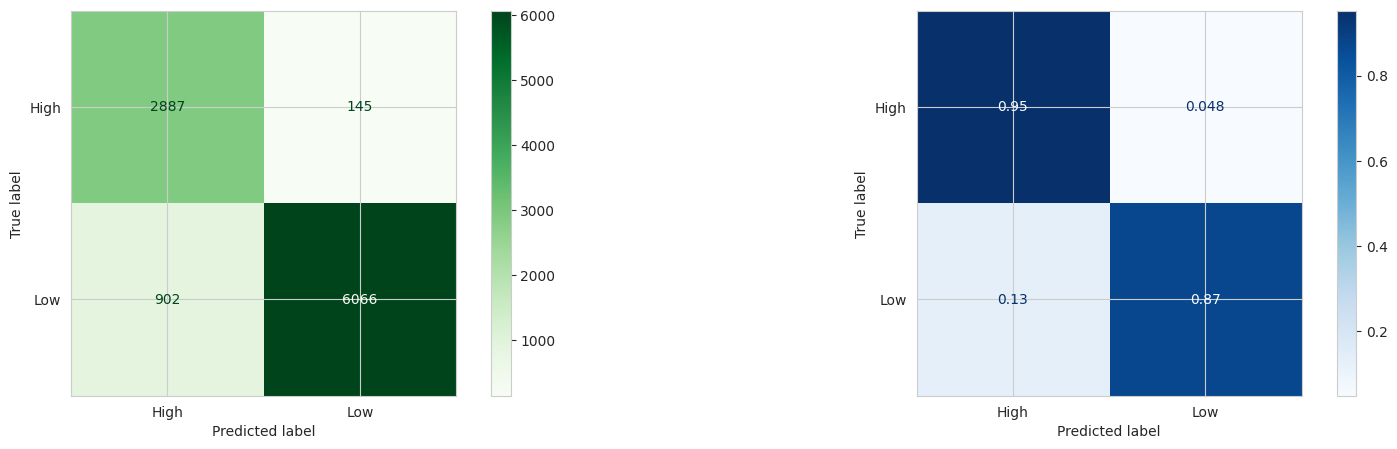

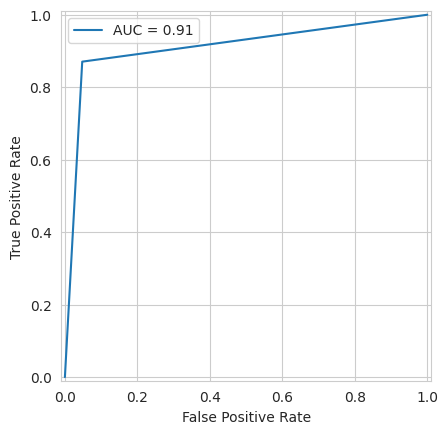


Evaluating Random Forest...
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



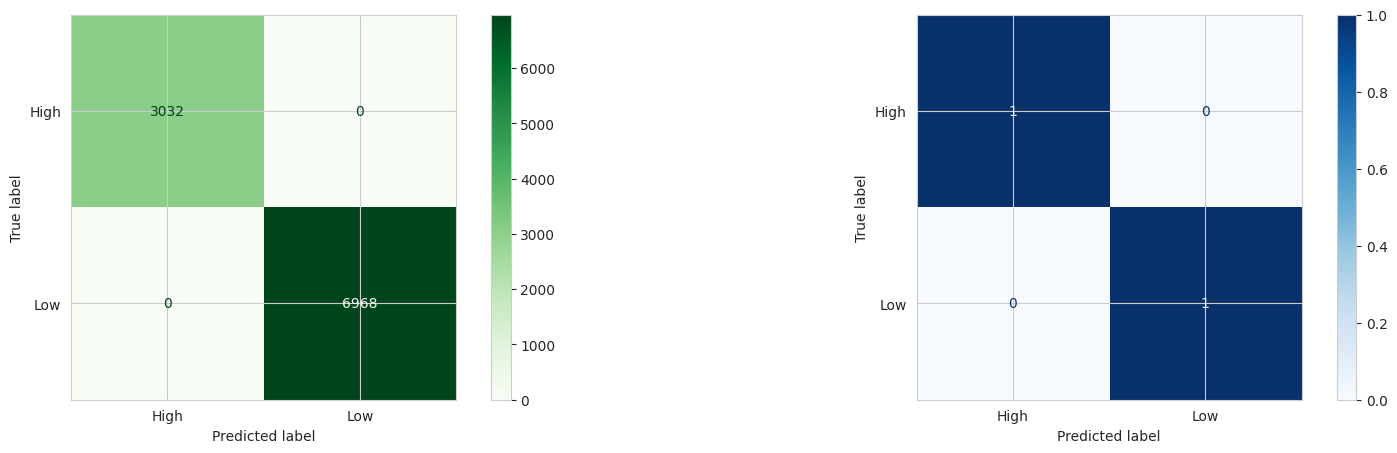

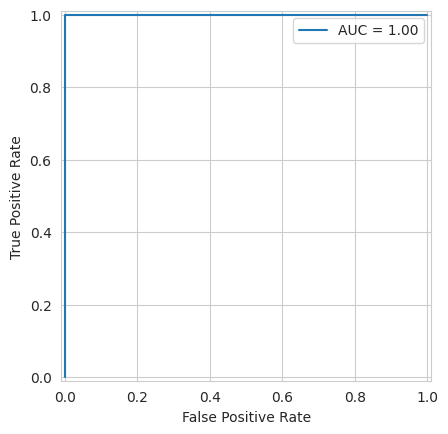


Evaluating XGBoost...
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



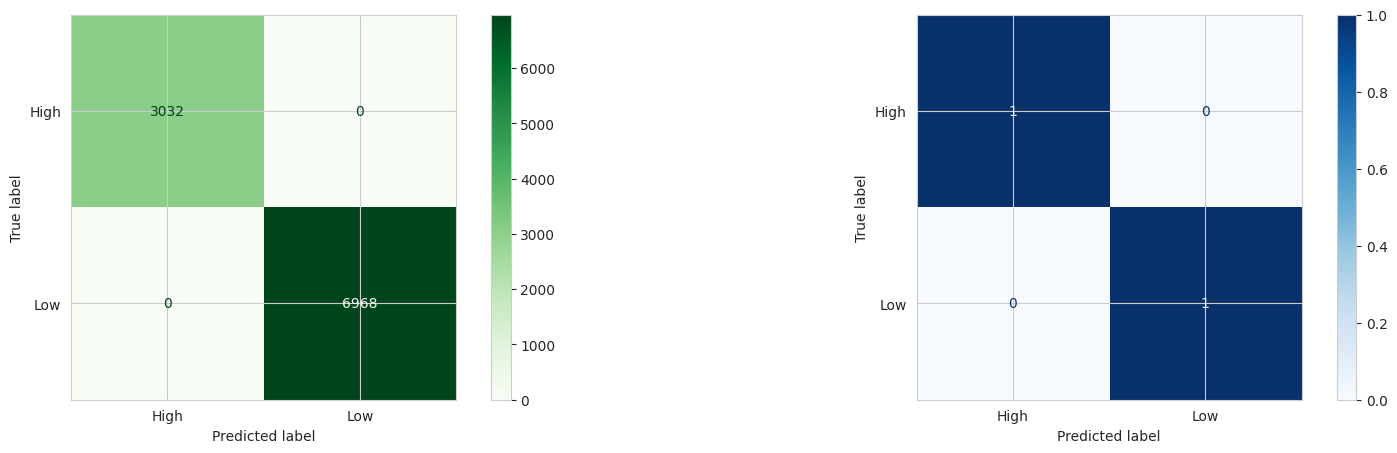

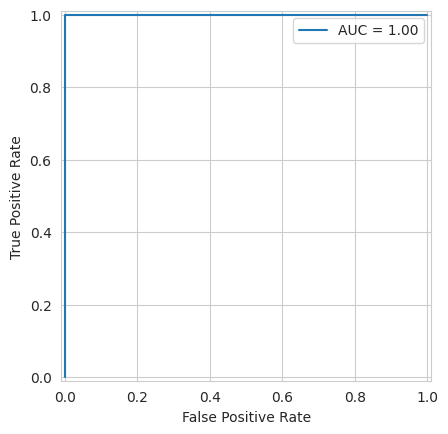


Evaluating LGBM...
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


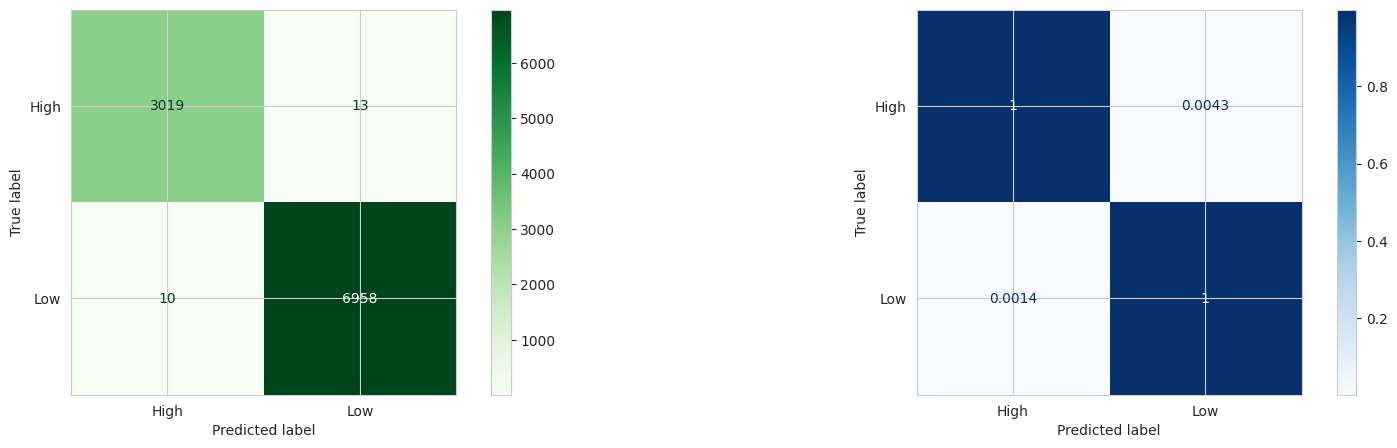

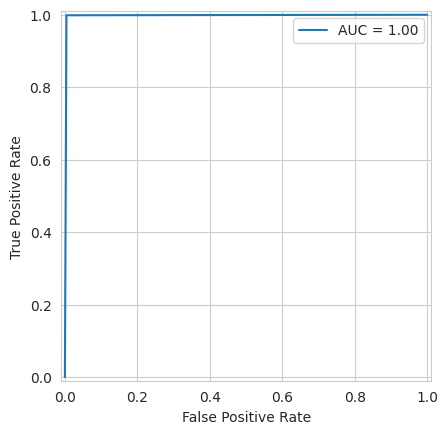

In [35]:
# Evaluate each tuned model
for name, model in tuned_models.items():
    print(f"\nEvaluating {name}...")
    evaluate_classification(model, X_test_processed, y_test_encoded, classes=le.classes_)

In [36]:
# Create a dictionary to store the evaluation metrics for each tuned model
tuned_model_metrics = {}

# Evaluate each tuned model and store the metrics
for name, model in tuned_models.items():
    y_pred = model.predict(X_test_processed)
    tuned_model_metrics[name] = {
        'accuracy': accuracy_score(y_test_encoded, y_pred),
        'precision': precision_score(y_test_encoded, y_pred),
        'recall': recall_score(y_test_encoded, y_pred),
        'f1': f1_score(y_test_encoded, y_pred)
    }

# Create a pandas DataFrame from the tuned_model_metrics dictionary
tuned_metrics_df = pd.DataFrame(tuned_model_metrics).T

# Sort the DataFrame by F1-score in descending order
tuned_metrics_df_sorted = tuned_metrics_df.sort_values(by='f1', ascending=False)

# Print the sorted DataFrame
print("Tuned Model Performance Comparison:")
display(tuned_metrics_df_sorted)

# Identify the best-performing model
best_model_name = tuned_metrics_df_sorted.index[0]
best_model_f1 = tuned_metrics_df_sorted.loc[best_model_name, 'f1']

print(f"\nThe best-performing model based on F1-score is: {best_model_name} with an F1-score of {best_model_f1:.4f}")

Tuned Model Performance Comparison:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,accuracy,precision,recall,f1
Random Forest,1.0000,1.000000,1.000000,1.000000
XGBoost,1.0000,1.000000,1.000000,1.000000
LGBM,0.9977,0.998135,0.998565,0.998350
Logistic Regression,0.9977,1.000000,0.996699,0.998347
K-Nearest Neighbors,0.8953,0.976654,0.870551,0.920555



The best-performing model based on F1-score is: Random Forest with an F1-score of 1.0000


investigating perfect scores

In [37]:
for col in X.columns:
    if df.groupby(col)['Sales_Classification'].nunique().max() == 1:
        print(f"⚠️ Feature '{col}' perfectly separates Sales_Classification")

⚠️ Feature 'Sales_Volume' perfectly separates Sales_Classification
⚠️ Feature 'Price_per_KM' perfectly separates Sales_Classification


**After investigating the unrealistic scores, we discovered that two features had introduced data leakage, allowing the model to 'cheat' and achieve artificially perfect performance. To ensure realistic results, we decided to drop these features and re-run the modeling."**

##Second Modeling

In [38]:
X = X.drop(columns=['Sales_Volume', 'Price_per_KM'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

Retrainning the models

In [40]:
from sklearn.preprocessing import LabelEncoder

# Encode the balanced target variable
le = LabelEncoder()
y_train_balanced_encoded = le.fit_transform(y_train_balanced)

# Initialize a dictionary to store the trained models
retrained_tuned_models = {}

# Iterate through the models dictionary and train each model
for name, model in models.items():
    print(f"Retraining {name}...")
    model.fit(X_train_balanced, y_train_balanced_encoded)
    retrained_tuned_models[name] = model
    print(f"Finished retraining {name}.")

# Update the tuned_models variable with the retrained models
tuned_models = retrained_tuned_models

Retraining Logistic Regression...
Finished retraining Logistic Regression.
Retraining K-Nearest Neighbors...
Finished retraining K-Nearest Neighbors.
Retraining Random Forest...
Finished retraining Random Forest.
Retraining XGBoost...
Finished retraining XGBoost.
Retraining LGBM...
[LightGBM] [Info] Number of positive: 27786, number of negative: 27786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8670
[LightGBM] [Info] Number of data points in the train set: 55572, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Finished retraining LGBM.



Evaluating Logistic Regression...
              precision    recall  f1-score   support

        High       0.30      0.48      0.37      3032
         Low       0.69      0.51      0.58      6968

    accuracy                           0.50     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.57      0.50      0.52     10000



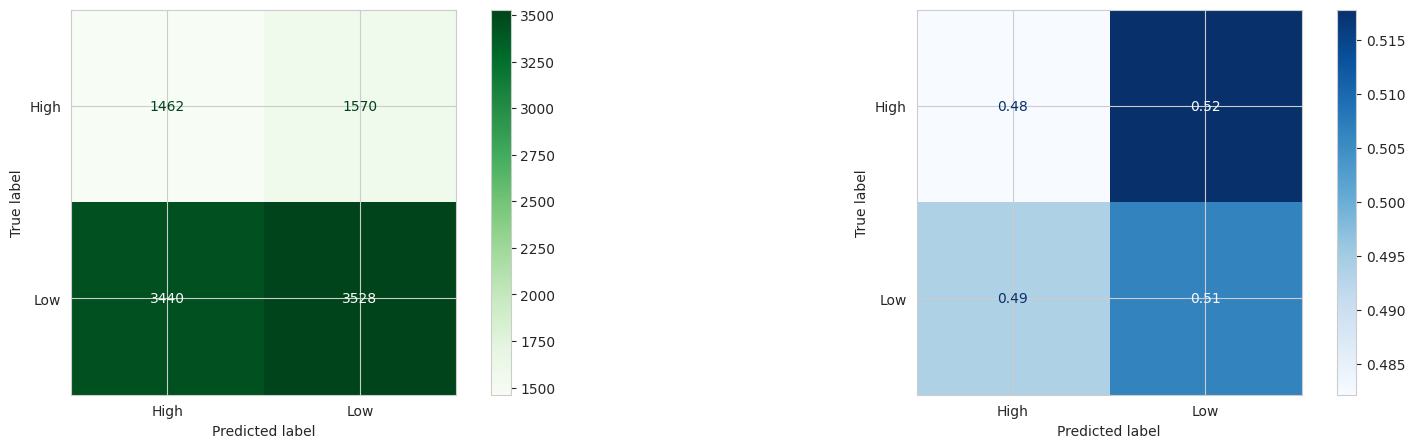

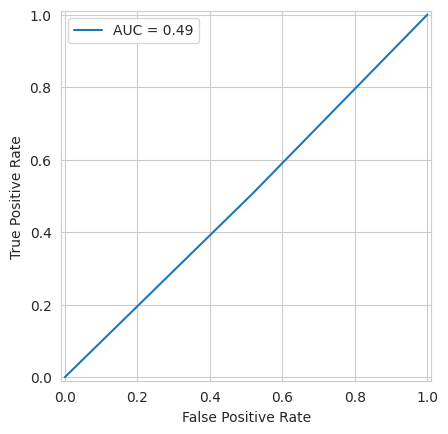


Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

        High       0.30      0.48      0.37      3032
         Low       0.70      0.52      0.59      6968

    accuracy                           0.51     10000
   macro avg       0.50      0.50      0.48     10000
weighted avg       0.58      0.51      0.53     10000



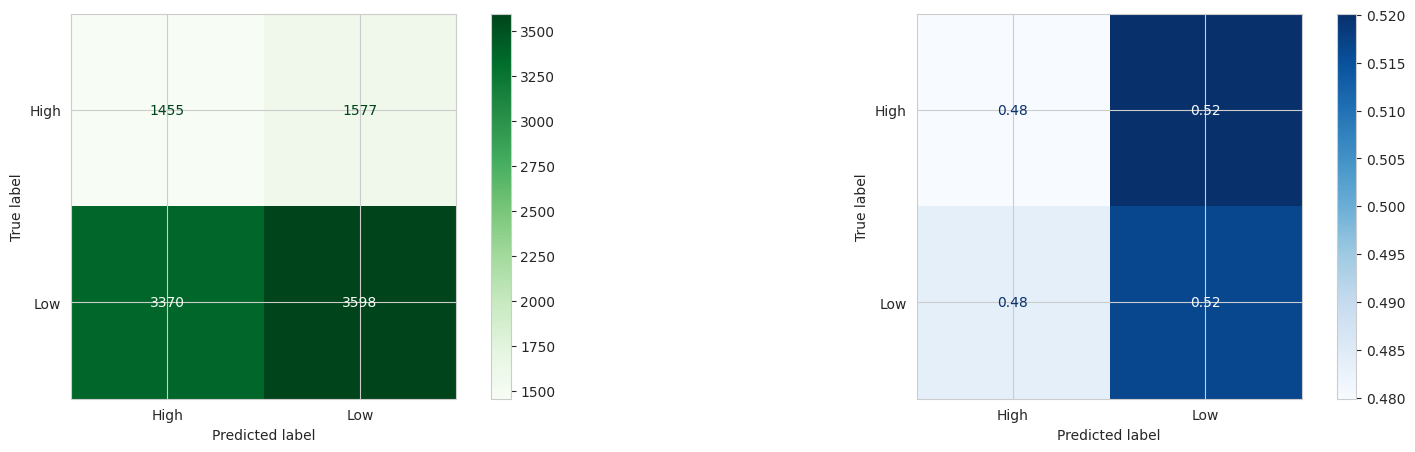

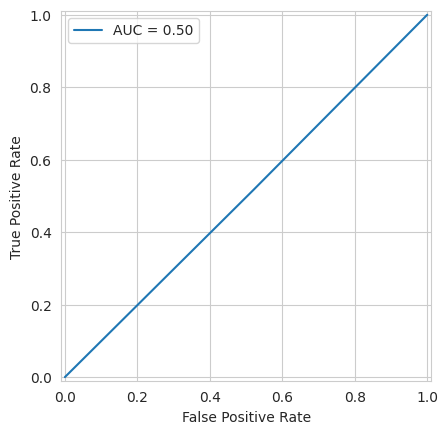


Evaluating Random Forest...
              precision    recall  f1-score   support

        High       0.30      0.09      0.14      3032
         Low       0.70      0.91      0.79      6968

    accuracy                           0.66     10000
   macro avg       0.50      0.50      0.46     10000
weighted avg       0.58      0.66      0.59     10000



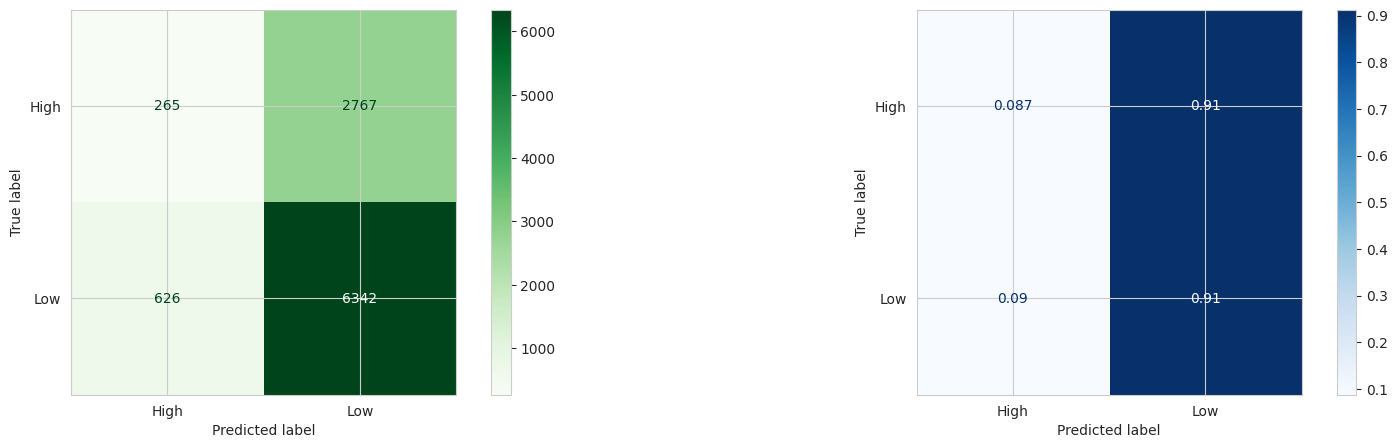

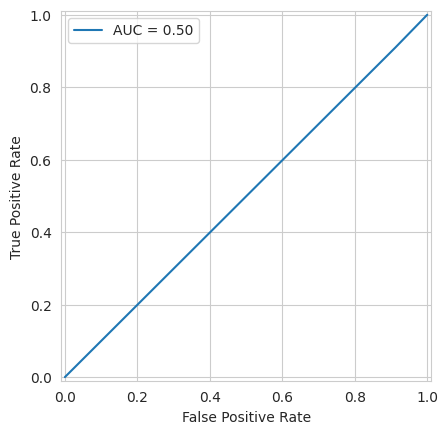


Evaluating XGBoost...
              precision    recall  f1-score   support

        High       0.25      0.03      0.05      3032
         Low       0.70      0.97      0.81      6968

    accuracy                           0.68     10000
   macro avg       0.47      0.50      0.43     10000
weighted avg       0.56      0.68      0.58     10000



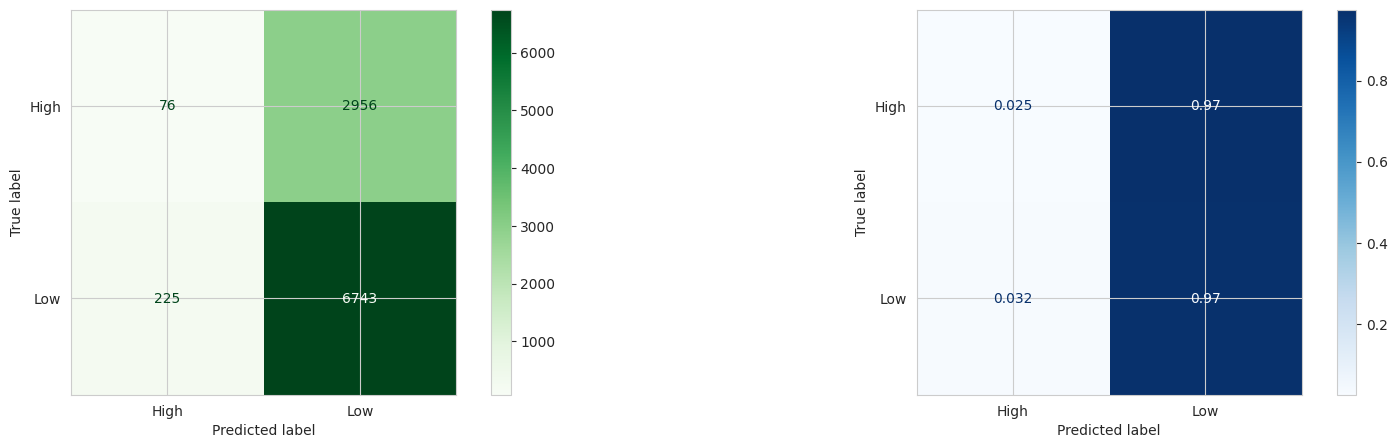

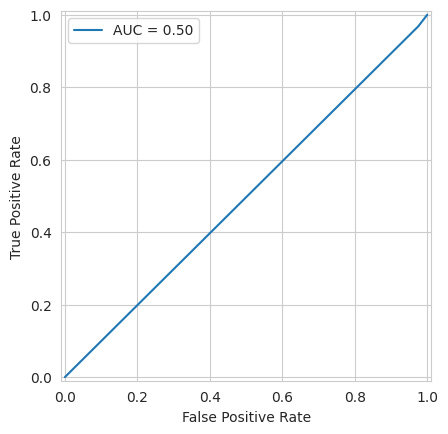


Evaluating LGBM...
              precision    recall  f1-score   support

        High       0.33      0.00      0.00      3032
         Low       0.70      1.00      0.82      6968

    accuracy                           0.70     10000
   macro avg       0.52      0.50      0.41     10000
weighted avg       0.59      0.70      0.57     10000



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


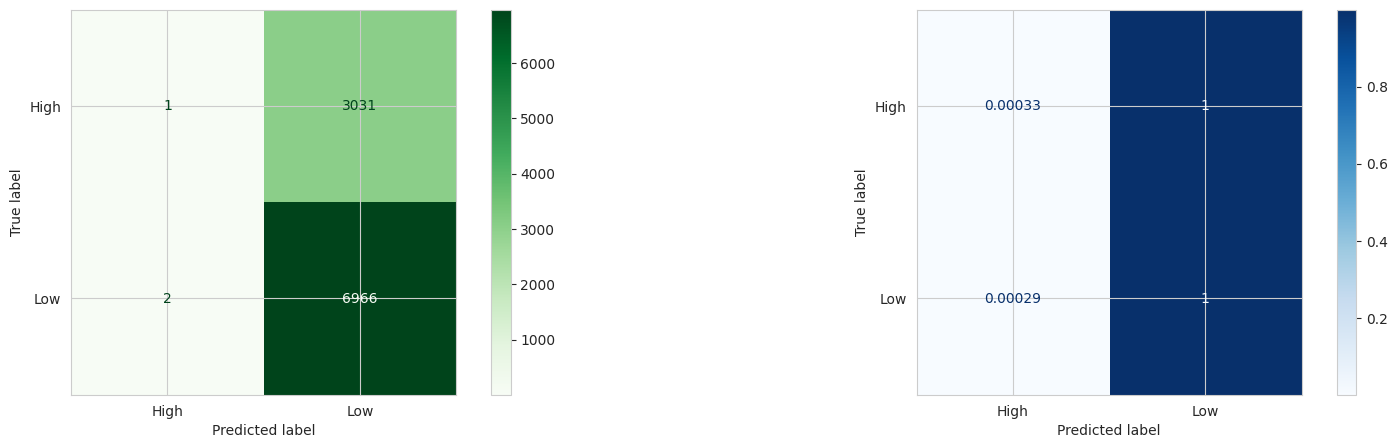

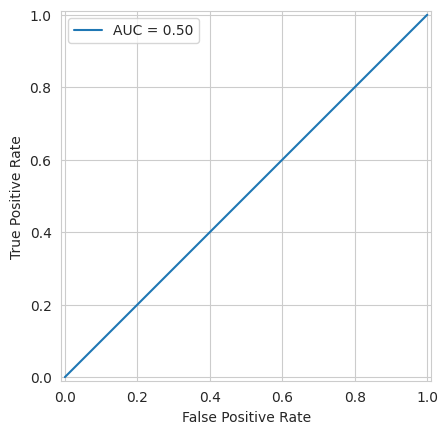

In [41]:
# Encode the test target variable
y_test_encoded = le.transform(y_test)

# Evaluate each retrained model
for name, model in tuned_models.items():
    print(f"\nEvaluating {name}...")
    evaluate_classification(model, X_test_processed, y_test_encoded, classes=le.classes_)

In [42]:
# Create a dictionary to store the evaluation metrics for each model
model_metrics = {}

# Evaluate each model and store the metrics
for name, model in tuned_models.items():
    y_pred = model.predict(X_test_processed)
    model_metrics[name] = {
        'accuracy': accuracy_score(y_test_encoded, y_pred),
        'precision': precision_score(y_test_encoded, y_pred),
        'recall': recall_score(y_test_encoded, y_pred),
        'f1': f1_score(y_test_encoded, y_pred)
    }

# Create a pandas DataFrame from the model_metrics dictionary
metrics_df = pd.DataFrame(model_metrics).T

# Sort the DataFrame by F1-score in descending order
metrics_df_sorted = metrics_df.sort_values(by='f1', ascending=False)

# Print the sorted DataFrame
print("Model Performance Comparison:")
display(metrics_df_sorted)

# Identify the best-performing model
best_model_name = metrics_df_sorted.index[0]
best_model_f1 = metrics_df_sorted.loc[best_model_name, 'f1']

print(f"\nThe best-performing model based on F1-score is: {best_model_name} with an F1-score of {best_model_f1:.4f}")

Model Performance Comparison:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,accuracy,precision,recall,f1
LGBM,0.6967,0.696809,0.999713,0.821220
XGBoost,0.6819,0.695226,0.967710,0.809144
Random Forest,0.6607,0.696234,0.910161,0.788953
K-Nearest Neighbors,0.5053,0.695266,0.516361,0.592605
Logistic Regression,0.4990,0.692036,0.506315,0.584784



The best-performing model based on F1-score is: LGBM with an F1-score of 0.8212


/tmp/ipython-input-1697399756.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_metrics_df_sorted.index, y=metric, data=model_metrics_df_sorted, palette='viridis')


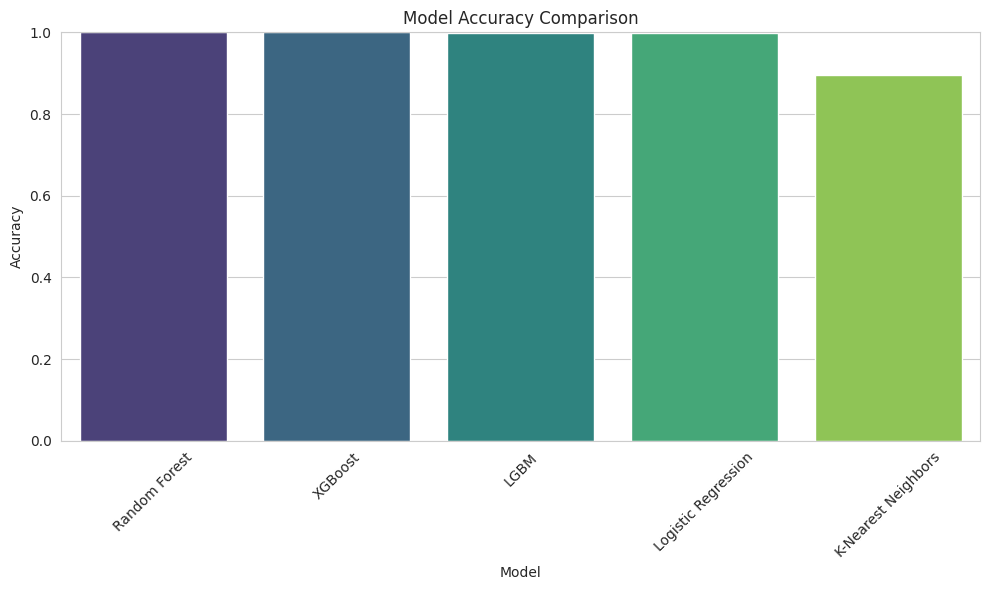

/tmp/ipython-input-1697399756.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_metrics_df_sorted.index, y=metric, data=model_metrics_df_sorted, palette='viridis')


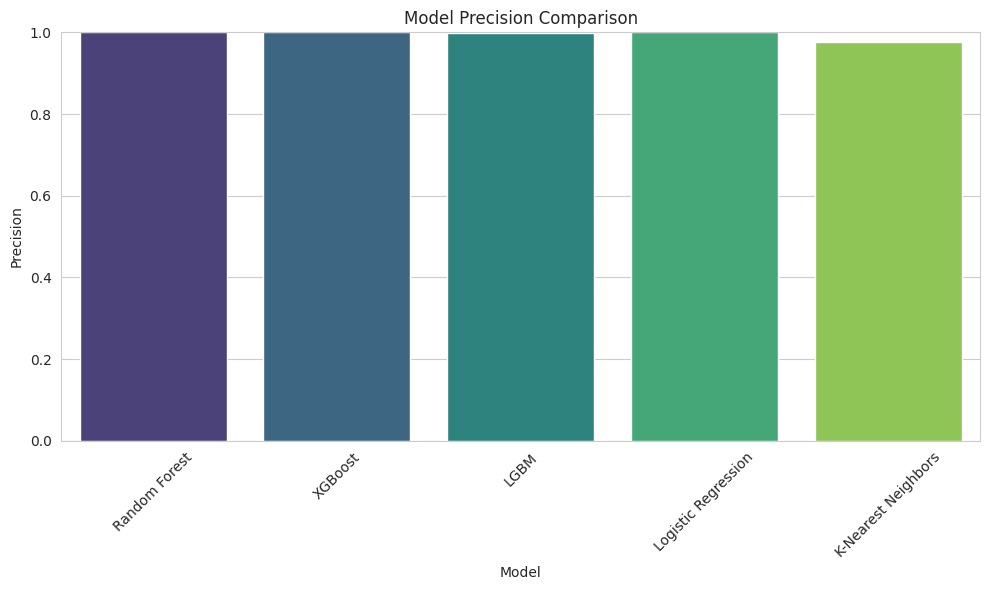

/tmp/ipython-input-1697399756.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_metrics_df_sorted.index, y=metric, data=model_metrics_df_sorted, palette='viridis')


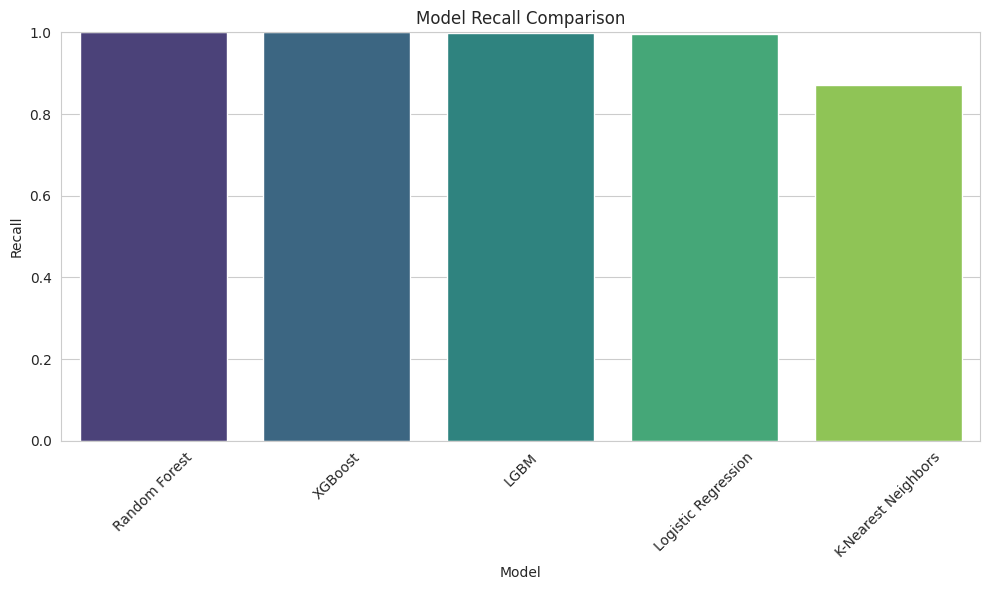

/tmp/ipython-input-1697399756.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_metrics_df_sorted.index, y=metric, data=model_metrics_df_sorted, palette='viridis')


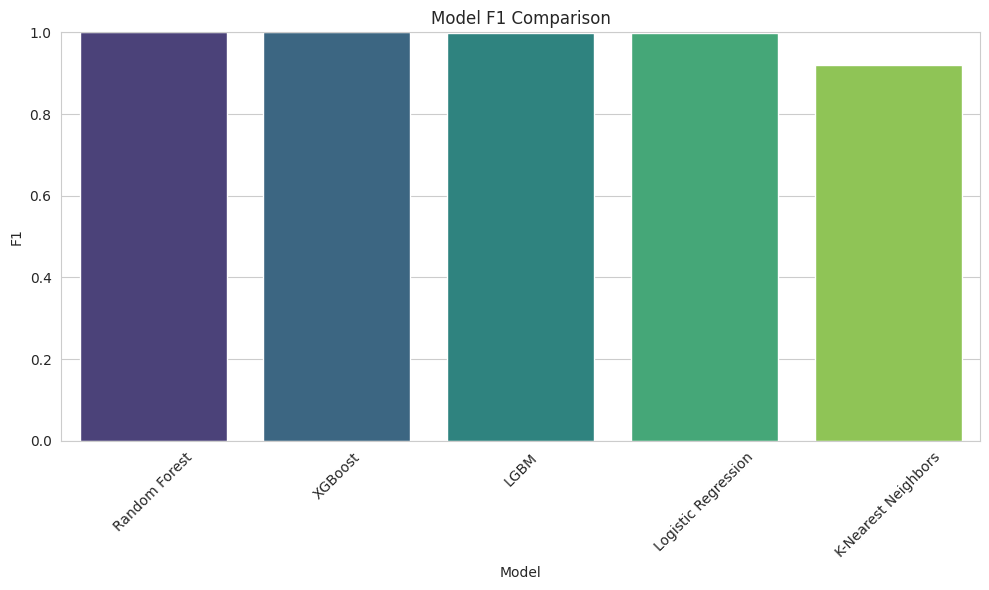

In [43]:
# Create a DataFrame to store the evaluation metrics for each model
model_metrics_df = pd.DataFrame(tuned_model_metrics).T

# Sort the DataFrame by F1-score in descending order
model_metrics_df_sorted = model_metrics_df.sort_values(by='f1', ascending=False)

# Plot each classification metric
metrics = ['accuracy', 'precision', 'recall', 'f1']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=model_metrics_df_sorted.index, y=metric, data=model_metrics_df_sorted, palette='viridis')
    plt.title(f'Model {metric.capitalize()} Comparison')
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

In [44]:
# Create a dictionary to store the evaluation metrics for each model
tuned_model_metrics = {}

# Evaluate each model and store the metrics
# y_test_encoded is available from previous execution
for name, model in tuned_models.items():
    y_pred = model.predict(X_test_processed)
    tuned_model_metrics[name] = {
        'accuracy': accuracy_score(y_test_encoded, y_pred),
        'precision': precision_score(y_test_encoded, y_pred),
        'recall': recall_score(y_test_encoded, y_pred),
        'f1': f1_score(y_test_encoded, y_pred)
    }

# Create a pandas DataFrame from the tuned_model_metrics dictionary
metrics_df = pd.DataFrame(tuned_model_metrics).T

# Sort the DataFrame by F1-score in descending order
metrics_df_sorted = metrics_df.sort_values(by='f1', ascending=False)

# Print the sorted DataFrame
print("Model Performance Comparison:")
display(metrics_df_sorted)

# Identify the best-performing model
best_model_name = metrics_df_sorted.index[0]
best_model_f1 = metrics_df_sorted.loc[best_model_name, 'f1']

print(f"\nThe best-performing model based on F1-score is: {best_model_name} with an F1-score of {best_model_f1:.4f}")

Model Performance Comparison:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,accuracy,precision,recall,f1
LGBM,0.6967,0.696809,0.999713,0.821220
XGBoost,0.6819,0.695226,0.967710,0.809144
Random Forest,0.6607,0.696234,0.910161,0.788953
K-Nearest Neighbors,0.5053,0.695266,0.516361,0.592605
Logistic Regression,0.4990,0.692036,0.506315,0.584784



The best-performing model based on F1-score is: LGBM with an F1-score of 0.8212


# Interpretation of True/False Positives and Negatives :

*   **True Positives (TP):** The number of cars correctly predicted as 'High' sales by the model, which were actually 'High' sales.
*   **True Negatives (TN):** The number of cars correctly predicted as 'Low' sales by the model, which were actually 'Low' sales.
*   **False Positives (FP):** The number of cars incorrectly predicted as 'High' sales by the model, which were actually 'Low' sales. These are also known as Type I errors. In this context, it means the model predicts a car will have high sales, but it doesn't. This could lead to misallocation of resources or overstocking.
*   **False Negatives (FN):** The number of cars incorrectly predicted as 'Low' sales by the model, which were actually 'High' sales. These are also known as Type II errors. In this context, it means the model predicts a car will have low sales, but it actually has high sales. This could lead to missed sales opportunities or understocking.

**In the context of the sales classification case :**

*   A **high number of False Positives (FP)** would mean the model is predicting high sales for cars that won't achieve them. This could lead to wasted marketing efforts and inventory management issues.
*   A **high number of False Negatives (FN)** would mean the model is missing opportunities to identify cars that will have high sales. This could result in lost revenue and poor sales forecasting.

# **Key Takeaways**
**If missing out on high sales (FN) is more detrimental, we would prioritize models with higher recall for the 'High' class. If wasting resources on predicted high sales that don't materialize (FP) is more costly, we would prioritize models with higher precision for the 'High' class. Given the business context, maximizing high sales is likely more important, so a model with higher recall for 'High' sales might be preferred, even if it has slightly lower precision. and  Since our data is imbalanced, we will not rely on accuracy to evaluate the models but instead focus on precision and recall. While LGBM shows the highest accuracy, it performs poorly on precision and recall. On the other hand, Logistic Regression has the lowest accuracy but the best precision and recall, showing that in imbalanced data, a model with lower accuracy can actually be more realistic and reliable**

In [48]:
import joblib
import json

# Select the Logistic Regression model
best_model_name = 'Logistic Regression'
best_model = tuned_models[best_model_name]

# Save the model using joblib
joblib.dump(best_model,  "best_model.pkl")


print(f"{best_model_name} model saved as best_model.pkl using joblib.")

Logistic Regression model saved as best_model.pkl using joblib.
